### Import packages

In [1]:
import pandas as pd
import numpy as np
import merging_functions as mf ### this package included part of the code that are repeated
                                 # throughout to make it more efficient
import geopandas as gpd
import matplotlib.pyplot as plt

### Define city and work folder

In [2]:
city='Denver'

FIPS = [8001, 8005, 8013, 8014, 8019, 8031, 8035, 8047, 8059]
state_code = 8

folder = 'Input_Files/'+city+'/'
out_folder = 'Output/Denver/'

### Load Stata Output File for Comparison

In [3]:
output = pd.read_stata(out_folder + 'clean_Denver_merge_081319.dta')
output.head(2)

,trtid10,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,hu_90,ohu_90,...,low_pdmt_55cut_80120_medhhinc_00,high_pdmt_55cut_80120_00,mod_pdmt_55cut_80120_medhhinc_00,mix_low_55cut_80120_medhhinc_00,mix_mod_55cut_80120_medhhinc_00,mix_high_55cut_80120_medhhinc_00,inc_cat_55cut_80120_medhhinc_00,_merge_inclevel_2000,lmh_flag_new_encoded,aff_change_cat_full_encoded
0,08001007801,1780.317747,952.732400,583.571023,23.324899,92.402483,940.621395,10049.832932,885.000482,187.496301,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3),1.0,4.0
1,08001007802,2188.682257,1171.267602,717.428979,28.675101,113.597517,1156.378607,12355.036654,1087.999519,230.503699,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3),1.0,4.0


In [4]:
output = mf.trtid10_to_FIPS(output)
output = output[~output['FIPS'].isna()]
output['FIPS'] = output['FIPS'].apply(np.int).apply(lambda x: '{:011}'.format(x))

In [5]:
import numpy as np

def trtid10_to_FIPS (dataframe):
    
    ### renames trtid10 to FIPS
    new_dataframe = dataframe.rename(columns = {'trtid10':'FIPS'})
    ### formats the FIPS code into a 12 digit str
    new_dataframe['FIPS'] = new_dataframe['FIPS'].apply(np.int).apply(lambda x: '{0:0>12}'.format(x)) 
    
    return new_dataframe

In [6]:
output['FIPS'].head()

0    08001007801
1    08001007802
2    08001007900
3    08001008000
4    08001008100
Name: FIPS, dtype: object

### Load base merge file

Also called joined_data_030619_cleaned

In [7]:
### Load file
raw_data=pd.read_stata(folder+'1990_111618.dta')

## Drop 2016 data
raw_data_dropped = raw_data[raw_data.columns.drop(list(raw_data.filter(regex='_16')))]

### Rename trtid10 to FIPS and reformat number
base_data = mf.trtid10_to_FIPS(raw_data_dropped)

base_data.head(1)

,FIPS,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,hu_90,ohu_90,...,per_nonwhite_90,per_nhblk_90,per_hisp_90,per_asian_90,col_90,per_col_90,per_carcommute_90,per_rent_90,units_pre50_90,per_units_pre50_90
0,08001007801,1780.317747,952.7324,583.571023,23.324899,92.402483,940.621395,10049.832932,885.000482,187.496301,...,0.464853,0.32779,0.051902,0.013102,71.320366,0.0617,0.569664,0.78814,287.972778,0.231351


### Load LA region file

In [8]:
## Load file
raw_la_region=pd.read_stata(folder+'larea_downtown.dta')

## Rename trtid10 to FIPS and reformat number
la_region = mf.trtid10_to_FIPS(raw_la_region)

la_region.head(1)

,FIPS,larea,downtown
0,08001007801,0.247702,0.0


### Load Income Interpolated

In [9]:
### Load file
raw_income_data=pd.read_stata(folder+'incomeinterpolated.dta')

### Rename trtid10 to FIPS and reformat number
income_data = mf.trtid10_to_FIPS(raw_income_data)

### Keep only relevant columns
income_data = income_data[['FIPS', 'hinc_90', 'hinc_00', 'hinc_17',
                           'countymedian_income90',
                           'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990',
                           'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000',
                           'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017']].copy(deep=True)
income_data.head(3)

,FIPS,hinc_90,hinc_00,hinc_17,countymedian_income90,vli1990,li1990,mi1990,hmi1990,hi1990,...,mi2000,hmi2000,hi2000,vhi2000,vli2017,li2017,mi2017,hmi2017,hi2017,vhi2017
0,08001007801,10049.832932,16385.505859,24420.0,41337.957031,0.447043,0.235595,0.106521,0.030994,0.076256,...,0.115270,0.081355,0.055411,0.043277,0.623988,0.200011,0.068452,0.050156,0.043298,0.014095
1,08001007802,12355.036654,20143.969417,28341.0,41337.957031,0.447043,0.235595,0.106521,0.030994,0.076256,...,0.115270,0.081355,0.055411,0.043277,0.602260,0.216814,0.098343,0.033809,0.025287,0.023486
2,08001007900,37896.086962,41404.202697,38297.0,41337.957031,0.304207,0.121868,0.126845,0.092120,0.105076,...,0.104174,0.080139,0.068892,0.131516,0.475955,0.239836,0.091678,0.068152,0.077618,0.046761


In [10]:
raw_income_data.columns

Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'GEOID',
       'hinc_17', 'B19013001s', 'hinc_90', 'hinc_16', 'hinc_00',
       'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990',
       'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000',
       'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017',
       'vhi2017'],
      dtype='object')

### Load ACS 2017 data

In [11]:
raw_acs_2017=pd.read_stata(folder+'2017.dta')

### Rename trtid10 to FIPS and reformat number
acs_2017 = mf.trtid10_to_FIPS(raw_acs_2017)

acs_2017.head()

,FIPS,pop_17,pop_17_se,nhwhite_17,hh_17,hinc_17,hinc_17_se,hu_17,ohu_17,rhu_17,...,per_col_17,per_carcommute_17,hhwchild_17,per_hhwchild_17,per_rent_17,per_units_pre50_17,per_built_00_17,per_rent_17_se,col_17_se,per_col_17_se
0,08001007801,4412,230.303030,491,1348,24420.0,2814.545455,1348,113,1235,...,0.069854,0.430043,691.0,0.512611,0.916172,0.131159,0.113043,0.002743,44.142685,0.000349
1,08001007802,4594,258.787879,507,1417,28341.0,3084.242424,1417,105,1312,...,0.023229,0.552095,712.0,0.502470,0.925900,0.118301,0.032026,0.003297,30.375669,0.000136
2,08001007900,5589,304.848485,1106,1881,38297.0,2075.151515,1881,567,1314,...,0.130071,0.668646,749.0,0.398192,0.698565,0.136863,0.013986,0.002204,88.630020,0.000801
3,08001008000,6412,378.181818,1592,1797,52219.0,1858.181818,1797,845,952,...,0.111702,0.650943,792.0,0.440735,0.529772,0.247562,0.002709,0.003479,80.533119,0.000497
4,08001008100,1563,126.666667,948,727,39156.0,3955.757576,727,24,703,...,0.645190,0.518919,70.0,0.096286,0.966988,0.000000,0.867246,0.011503,106.778519,0.012827


### Load ACS 2000 data

In [12]:
raw_acs_2000=pd.read_stata(folder+'2000_111618.dta')

### Rename trtid10 to FIPS and reformat number
acs_2000 = mf.trtid10_to_FIPS(raw_acs_2000)

acs_2000.head()

,FIPS,hinc_00,pop_00,nhwhite_00,nhblk_00,asian_00,hisp_00,hh_00,hu_00,ohu_00,rhu_00,per_nonwhite_00,per_nhblk_00,per_hisp_00,per_asian_00,col_00,per_col_00,per_carcommute_00,per_rent_00
0,08001007801,16385.505859,3758.0,695.261399,519.427548,81.637145,2330.247076,1213.791836,1217.380282,205.887085,1011.493196,0.814992,0.138219,0.620076,0.021724,98.682266,0.049921,0.475631,0.830877
1,08001007802,20143.969417,4620.0,854.738601,638.572452,100.362855,2864.752924,1492.208164,1496.619718,253.112915,1243.506804,0.814992,0.138219,0.620076,0.021724,121.317734,0.049921,0.475631,0.830877
2,08001007900,41404.202697,6617.0,1309.000000,1035.000000,51.000000,4071.000000,1948.000000,1944.000000,733.000000,1211.000000,0.802176,0.156415,0.615233,0.007707,210.000000,0.059710,0.533446,0.622942
3,08001008000,55325.202289,6164.0,1868.000000,1123.000000,225.000000,2672.000000,1931.000000,1897.000000,1323.000000,574.000000,0.696950,0.182187,0.433485,0.036502,204.000000,0.058570,0.746593,0.302583
4,08001008100,48944.684103,1069.0,450.000000,79.000000,26.000000,398.000000,317.000000,350.000000,86.000000,264.000000,0.579046,0.073901,0.372311,0.024322,93.000000,0.186373,0.734375,0.754286


### Load 2002 Employment

In [13]:
raw_employ_2002=pd.read_stata(folder+'2002_emp_co.dta')

### Rename trtid10 to FIPS and reformat number
employ_2002 = mf.trtid10_to_FIPS(raw_employ_2002)

employ_2002.head()

,FIPS,tot_jobs
0,08001007801,780.0
1,08001007802,308.0
2,08001007900,510.0
3,08001008000,73.0
4,08001008100,121.0


### Load income 2000 data

In [14]:
# ### Load file
# # Contains median household incomes for 1990,2000 & 2017 ****** THIS IS NOT TRUE - 2016 -
# # & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
# raw_income_2000=pd.read_stata(folder+'income2000.dta')

# ### Keep only relevant columns
# income_2000 = raw_income_2000[['trtid10', 'countymedian_income00', 'hinc_90',
#                                'hinc_00', 'hinc_16',
#                                'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000']]

# ### Rename trtid10 to FIPS and reformat number
# income_2000 = mf.trtid10_to_FIPS(income_2000)

# income_2000.head(1)

### Load income 2017 data

In [15]:
# ### Load file
# # Contains median household incomes for 2017 & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
# raw_income_2017=pd.read_stata(folder+'income2017.dta')

# ### Keep only relevant columns
# income_2017 = raw_income_2017[['trtid10', 'hinc_17', 'regmedhhi_17',
#                                'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017']]

# ### Rename trtid10 to FIPS and reformat number
# income_2017 = mf.trtid10_to_FIPS(income_2017)

# income_2017.head(5)

In [16]:
# ### Double check with ACS 17-5Yr Estimates
# ### Load file
# # Contains median household incomes for 2017 & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
# raw_ACS_2017_income=pd.read_csv(folder+'ACS_17_5YR_S1901_with_ann.csv')
# ACS_2017_income = raw_ACS_2017_income.drop(raw_ACS_2017_income.index[0]).reset_index(drop = True)
# ACS_2017_income = ACS_2017_income[['GEO.id2','HC01_EST_VC13']]
# ACS_2017_income = ACS_2017_income.rename(columns = {'GEO.id2':'FIPS'})
# ACS_2017_income[ACS_2017_income['FIPS']=='17031010100']

In [17]:
# print('hinc_17 is the HH median income for 2017')

### Load renter and homeowner data 1990

In [18]:
## Load file
raw_tenure_1990=pd.read_stata(folder+'21990_mh.dta')

### Rename trtid10 to FIPS and reformat number
tenure_1990 = mf.trtid10_to_FIPS(raw_tenure_1990)

tenure_1990.head(1)

,FIPS,mrent_90,mhval_90,H043_002,H061_001
0,08001007801,275.999988,53000.002019,684.496065,153.85462


### Load renter and homeowner data 2000

In [19]:
## Load file
raw_tenure_2000=pd.read_stata(folder+'22000_mh.dta')

### Rename trtid10 to FIPS and reformat number
tenure_2000 = mf.trtid10_to_FIPS(raw_tenure_2000)

tenure_2000.head(1)

,FIPS,mrent_00,mhval_00,H062002,H084001
0,08001007801,526.999999,104699.999318,1000.279295,205.887084


### Load renter and homeowner data 2010

In [20]:
## Load file
raw_tenure_2010=pd.read_stata(folder+'mrent_mhval_10.dta')

### Rename trtid10 to FIPS and reformat number
tenure_2010 = mf.trtid10_to_FIPS(raw_tenure_2010)

tenure_2010.head(1)

,FIPS,mrent_10,mhval_10
0,08001007801,630.0,151700.0


### Load ACS Census Data 1990 data

In [21]:
### Load file
raw_acs_1990=pd.read_stata(folder+'1990_111618.dta')

### Keep only relevant columns
# acs_1990 = raw_acs_1990[['r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001',
#                             'trtid10']].copy(deep=True)

### Rename trtid10 to FIPS and reformat number
acs_1990 = mf.trtid10_to_FIPS(raw_acs_1990)

acs_1990.head(1)

,FIPS,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,hu_90,ohu_90,...,per_nonwhite_90,per_nhblk_90,per_hisp_90,per_asian_90,col_90,per_col_90,per_carcommute_90,per_rent_90,units_pre50_90,per_units_pre50_90
0,08001007801,1780.317747,952.7324,583.571023,23.324899,92.402483,940.621395,10049.832932,885.000482,187.496301,...,0.464853,0.32779,0.051902,0.013102,71.320366,0.0617,0.569664,0.78814,287.972778,0.231351


### Load movers 2009 data

In [22]:
### Load file
# Contains regional medain , 2009 movein totals, percent low income move-in in 2009
raw_movers_2009=pd.read_stata(folder+'2009_movers.dta')

### Rename trtid10 to FIPS and reformat number
movers_2009 = mf.trtid10_to_FIPS(raw_movers_2009)

movers_2009.head(1)

,FIPS,co_medinc_09,moveinincd_09,per_limove_09
0,08001007801,32171.0,598.821899,0.621336


### Load movers 2010 data

In [23]:
# ### Load file
# raw_movers_2010=pd.read_stata(folder+'YearHouseholderMovedIn_Chicago2010.dta')

# ### Rename trtid10 to FIPS and reformat number
# movers_2010 = mf.trtid10_to_FIPS(raw_movers_2010)

# movers_2010.head(1)

### Load movers 2017 interpolated

In [24]:
raw_movers_2017=pd.read_stata(folder+'2017_mover_interpolated.dta')

### Rename trtid10 to FIPS and reformat number
movers_2017 = mf.trtid10_to_FIPS(raw_movers_2017)

movers_2017.head()

,FIPS,reg_medindinc_17,moveinincd_17,per_limove_17
0,08001007801,32865.5,669.0,0.809351
1,08001007802,32865.5,658.0,0.826323
2,08001007900,32865.5,892.0,0.659839
3,08001008000,32865.5,631.0,0.663539
4,08001008100,32865.5,446.0,0.518897


### Load Year HHed Moved In

In [25]:
### Load file
raw_movin_year=pd.read_stata(folder+'YearHouseholderMovedIn_Denver2010.dta')

### Rename trtid10 to FIPS and reformat number
movin_year = mf.trtid10_to_FIPS(raw_movin_year)

### Rename Standard Deviations Columns
movin_year = movin_year.rename(columns = {'B25038001s':'se_occupiedunits',
                                         'B25038002s':'se_owneroccunits',
                                         'B25038003s':'se_ownerocc_2015orlater',
                                         'B25038004s':'se_ownerocc_2010to2014',
                                         'B25038005s':'se_ownerocc_2000to2009',
                                         'B25038006s':'se_ownerocc_1990to1999',
                                         'B25038007s':'se_ownerocc_1980to1989',
                                         'B25038008s':'se_ownerocc_1979orearlier',
                                         'B25038009s':'se_renteroccunits',
                                         'B25038010s':'se_renterocc_2015orlater',
                                         'B25038011s':'se_renterocc_2010to2014',
                                         'B25038012s':'se_renterocc_2000to2009',
                                         'B25038013s':'se_renterocc_1990to1999',
                                         'B25038014s':'se_renterocc_1980to1989',
                                         'B25038015s':'se_renterocc_1979orearlier'})

### Keep only relevant columns
movin_year = movin_year[['FIPS', 'se_occupiedunits', 'se_owneroccunits',
                         'se_ownerocc_2015orlater', 'se_ownerocc_2010to2014', 'se_ownerocc_2000to2009',
                         'se_ownerocc_1990to1999', 'se_ownerocc_1980to1989', 'se_ownerocc_1979orearlier',
                         'se_renteroccunits', 'se_renterocc_2015orlater', 'se_renterocc_2010to2014',
                         'se_renterocc_2000to2009', 'se_renterocc_1990to1999', 'se_renterocc_1980to1989',
                         'pct_renter_recentmovein', 'pct_owner_recentmovein', 'pct_tot_recentmovein',
                         'pct_renter_recentmovein2010', 'pct_owner_recentmovein2010', 'pct_tot_recentmovein2010',
                         'rm_pct_recentmovein', 'aboverm_pct_recentmovein', 'rm_pct_recentmovein2010',
                         'aboverm_pct_recentmovein2010', 'occupiedunits', 'owneroccunits',
                         'ownerocc_2015orlater', 'ownerocc_2010to2014', 'ownerocc_2000to2009',
                         'ownerocc_1990to1999', 'ownerocc_1980to1989', 'renteroccunits', 'renterocc_2015orlater',
                         'renterocc_2010to2014','renterocc_2000to2009', 'renterocc_1990to1999',
                         'renterocc_1980to1989']]


movin_year.head(1)

,FIPS,se_occupiedunits,se_owneroccunits,se_ownerocc_2015orlater,se_ownerocc_2010to2014,se_ownerocc_2000to2009,se_ownerocc_1990to1999,se_ownerocc_1980to1989,se_ownerocc_1979orearlier,se_renteroccunits,...,ownerocc_2010to2014,ownerocc_2000to2009,ownerocc_1990to1999,ownerocc_1980to1989,renteroccunits,renterocc_2015orlater,renterocc_2010to2014,renterocc_2000to2009,renterocc_1990to1999,renterocc_1980to1989
0,08001007801,47.272727,27.878788,7.272727,26.060606,10.30303,13.333333,7.272727,7.272727,55.757576,...,68,17,20,0,1235,350,774,111,0,0


### Load exclusive zones data

In [26]:
### Load file
raw_exclusive_zone=pd.read_csv(folder+'Denver_Proximity.csv')

## Drop rows without data
raw_exclusive_zone = raw_exclusive_zone.dropna().reset_index(drop=True)

###Rename variable
raw_exclusive_zone = raw_exclusive_zone.rename(columns = {'excli':'exclusive'})

### Rename trtid10 to FIPS and reformat number
exclusive_zone = mf.trtid10_to_FIPS(raw_exclusive_zone)

### Keep only relevant columns
exclusive_zone = exclusive_zone[['FIPS', 'proximity', 'exclusive']]

### Convert dummy to int
exclusive_zone['exclusive'] = exclusive_zone['exclusive'].astype(int)

### Keep only records for the census tracts defined in FIPS variable
exclusive_zone['FIPS_temp']=exclusive_zone['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
exclusive_zone = exclusive_zone[exclusive_zone['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
exclusive_zone = exclusive_zone.drop(columns='FIPS_temp')

exclusive_zone.head()

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,proximity,exclusive
0,08001007801,0,0
1,08001008506,0,0
2,08001008508,0,0
3,08001008546,0,0
4,08001008801,0,0


### Load mortgage application data

In [27]:
### Load file
raw_mortgage=pd.read_stata(folder+'Denver_HMDA_Denial_Application_Rates.dta')

### Rename trtid10 to FIPS and reformat number
mortgage = mf.trtid10_to_FIPS(raw_mortgage)

### Convert dummy to int
mortgage['low_app_rate'] = mortgage['low_app_rate'].astype(int)

### Keep only relevant columns
mortgage = mortgage[['FIPS', 'owneroccunits', 'renterocc_units',
                                 'per_own_17', 'per_rent_17', 'tot_units', 'applicationrate',
                                 'high_dr20', 'high_dr25', 'high_dr30', 'low_app_rate']]
mortgage.head()

,FIPS,owneroccunits,renterocc_units,per_own_17,per_rent_17,tot_units,applicationrate,high_dr20,high_dr25,high_dr30,low_app_rate
0,08001007801,113,1235,8.380000,91.620003,1348.0,0.054154,1.0,0.0,0.0,0
1,08001007802,105,1312,7.410000,92.589996,1417.0,0.057163,1.0,1.0,0.0,0
2,08001007900,567,1314,30.139999,69.860001,1881.0,0.142477,0.0,0.0,0.0,0
3,08001008000,845,952,47.020000,52.980000,1797.0,0.222037,1.0,0.0,0.0,0
4,08001008100,24,703,3.300000,96.699997,727.0,0.005502,1.0,1.0,0.0,1


### Load public housing data

In [28]:
### Load file
raw_pub_housing=pd.read_stata(folder+'ph-LIHTC_merge_denver_062519.dta')

## Rename trtid10 to FIPS and reformat number
pub_housing = mf.trtid10_to_FIPS(raw_pub_housing)

### Keep only relevant columns
pub_housing = pub_housing[['FIPS', 'presence_ph_LIHTC']]
pub_housing['presence_ph_LIHTC']=pub_housing['presence_ph_LIHTC'].astype(int)

pub_housing.head()

,FIPS,presence_ph_LIHTC
0,08001009553,1
1,08005005551,1
2,08005005623,1
3,08005005700,1
4,08005005951,1


### Load prison data

In [29]:
### Load file
raw_prison=pd.read_stata(folder+'DenverPrison_Processed.dta')

## Rename trtid10 to FIPS and reformat number
prison = mf.trtid10_to_FIPS(raw_prison)

### Keep only relevant columns
prison = prison[['FIPS', 'prison_pct', 'prison_flag', 'highprisonpop_flag']]

### Convert dummy to int
prison['prison_flag']=prison['prison_flag'].astype(int)
prison['highprisonpop_flag']=prison['highprisonpop_flag'].astype(int)

prison.head()

,FIPS,prison_pct,prison_flag,highprisonpop_flag
0,08001007801,0.0,0,0
1,08001007802,0.0,0,0
2,08001007900,0.0,0,0
3,08001008000,0.0,0,0
4,08001008100,0.0,0,0


### Prepare LI Home-ownership data

In [30]:
### Load file
raw_LI_HOW_flag=pd.read_stata(folder+'homeownershipflag_LIneighbs.dta')

## Rename trtid10 to FIPS and reformat number
LI_HOW_flag = mf.trtid10_to_FIPS(raw_LI_HOW_flag)

## Keep only records for the census tracts defined in FIPS variable
LI_HOW_flag['FIPS_temp']=LI_HOW_flag['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
LI_HOW_flag = LI_HOW_flag[LI_HOW_flag['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
LI_HOW_flag = LI_HOW_flag.drop(columns='FIPS_temp')

### Keep only relevant columns
LI_HOW_flag = LI_HOW_flag[['FIPS', 'LItract', 'homeownership_rm_LItracts', 'aboverm_homeownership_LItracts']]

### Convert dummy to int
LI_HOW_flag['LItract']=LI_HOW_flag['LItract'].astype(int)

# *** THIS SET OF CODE WON'T RUN BC OF NAN VALUES ***
# LI_HOW_flag['aboverm_homeownership_LItracts']=LI_HOW_flag['aboverm_homeownership_LItracts'].astype(int)

LI_HOW_flag.head()

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,LItract,homeownership_rm_LItracts,aboverm_homeownership_LItracts
0,08001007801,1,45.465,0.0
1,08001007802,1,45.465,0.0
2,08001007900,1,45.465,0.0
3,08001008000,1,45.465,1.0
4,08001008100,1,45.465,0.0


### Load foreclosure data

In [31]:
### Load file
raw_foreclosure=pd.read_stata(folder+'Denver_Foreclosure_072019.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_foreclosure = raw_foreclosure.rename(columns = {'tractcode':'trtid10'})
foreclosure = mf.trtid10_to_FIPS(raw_foreclosure)

### Keep only relevant columns
foreclosure = foreclosure[['FIPS', 'estimated_foreclosure_rate', 'rm_foreclosure_rate', 'aboverm_foreclosurerate']]

### Convert dummy to int
foreclosure['aboverm_foreclosurerate']=foreclosure['aboverm_foreclosurerate'].astype(int)

foreclosure.head()

,FIPS,estimated_foreclosure_rate,rm_foreclosure_rate,aboverm_foreclosurerate
0,08001007800,11.2%,4.1,1
1,08001007900,10.5%,4.1,1
2,08001008000,10.5%,4.1,1
3,08001008100,16.7%,4.1,1
4,08001008200,10.3%,4.1,1


### Load neighborhood income level data

In [32]:
### Load file
raw_neigh_income=pd.read_stata(folder+'neighb_inc_level_053119.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_neigh_income = raw_neigh_income.rename(columns = {'stctytrct':'trtid10'})
neigh_income = mf.trtid10_to_FIPS(raw_neigh_income)

### Keep only records for the census tracts defined in FIPS variable
neigh_income['FIPS_temp']=neigh_income['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
neigh_income = neigh_income[neigh_income['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
neigh_income = neigh_income.drop(columns='FIPS_temp')

### Keep only relevant columns
neigh_income = neigh_income[['FIPS', 'reg_med_inc60_17', 'reg_med_inc120_17', 'reg_med_inc80_17',
                             'low_pdmt_80120', 'mod_pdmt_80120', 'high_pdmt_80120', 'low_pdmt_55cut_80120_medhhinc',
                             'high_pdmt_55cut_80120_medhhinc', 'mod_pdmt_55cut_80120_medhhinc',
                             'mix_low_55cut_80120_medhhinc', 'mix_mod_55cut_80120_medhhinc',
                             'mix_high_55cut_80120_medhhinc', 'inc_cat_55cut_80120_medhhinc']]

neigh_income.head() ### should be converted to dummies, but this should be changed from the variable definition

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,reg_med_inc60_17,reg_med_inc120_17,reg_med_inc80_17,low_pdmt_80120,mod_pdmt_80120,high_pdmt_80120,low_pdmt_55cut_80120_medhhinc,high_pdmt_55cut_80120_medhhinc,mod_pdmt_55cut_80120_medhhinc,mix_low_55cut_80120_medhhinc,mix_mod_55cut_80120_medhhinc,mix_high_55cut_80120_medhhinc,inc_cat_55cut_80120_medhhinc
0,08001007801,43600.199219,87200.398438,58133.601562,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,08001007802,43600.199219,87200.398438,58133.601562,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,08001007900,43600.199219,87200.398438,58133.601562,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,08001008000,43600.199219,87200.398438,58133.601562,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,08001008100,43600.199219,87200.398438,58133.601562,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Load vacancy data

In [33]:
### Load file
raw_vacancy=pd.read_stata(folder+'CO_20175YR_vacancyrate.dta')

# ## Rename trtid10 to FIPS and reformat number
vacancy = mf.trtid10_to_FIPS(raw_vacancy)

### Keep only records for the census tracts defined in FIPS variable
vacancy['FIPS_temp']=vacancy['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
vacancy = vacancy[vacancy['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
vacancy = vacancy.drop(columns='FIPS_temp')

### Keep only relevant columns
vacancy = vacancy[['FIPS', 'vacancy_rate', 'rm_vacancy', 'vacancy_rm_flag']]

### Convert dummy to int
vacancy['vacancy_rm_flag']=vacancy['vacancy_rm_flag'].astype(int)

vacancy.head()

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,vacancy_rate,rm_vacancy,vacancy_rm_flag
0,08001007801,0.011594,0.01461,0
1,08001007802,0.021569,0.01461,1
2,08001007900,0.023976,0.01461,1
3,08001008000,0.000000,0.01461,0
4,08001008100,0.021092,0.01461,1


### Load housing units data

In [34]:
### Load file
raw_housing_units=pd.read_stata(folder+'2010_2017_units_v_HHs.dta')

# Reformat FIPS number
housing_units = raw_housing_units.copy(deep=True)
housing_units['FIPS'] = housing_units['FIPS'].apply(np.int).apply(lambda x: '{0:0>11}'.format(x))

### Keep only relevant columns
housing_units = housing_units[['FIPS', 'A10008_001', 'A10001_001', 'T058_001', 'T068_001', 'change_units_2010_2017']]

### Compute percent change in HH
housing_units['per_change_HHs_2010_2017'] = (housing_units['A10008_001'] - housing_units['T058_001'])/housing_units['T058_001']*100
housing_units['per_change_units_2010_2017'] = (housing_units['A10001_001'] - housing_units['T068_001'])/housing_units['T068_001']*100

# # ***** Flagging data *****
# Units increased less than HH over the period
# Change in HH > 0 - otherwise Flag == 0
df=housing_units
housing_units['flag_units_v_HHs'] = np.nan
df.loc[(df['per_change_units_2010_2017'] >= df['per_change_HHs_2010_2017']), 'flag_units_v_HHs'] = 0
df.loc[(df['per_change_units_2010_2017'] < df['per_change_HHs_2010_2017']), 'flag_units_v_HHs'] = 1
df.loc[(df['per_change_HHs_2010_2017'] <=0), 'flag_units_v_HHs'] = 0

# #Units increased MORE than regional median
rm_units_2010_2017 = (np.nanmedian(df['per_change_units_2010_2017']))
print('The regional median percent change in units is '+str(rm_units_2010_2017))
housing_units['flag_rm_units_change'] = np.nan
df.loc[(df['change_units_2010_2017'] >= rm_units_2010_2017), 'flag_rm_units_change'] = 1
df.loc[(df['change_units_2010_2017'] < rm_units_2010_2017), 'flag_rm_units_change'] = 0

### THIS IS FIXING THE CODE FOR FLAGGING DATA
### **** Check this again, but it was fine the first time ****

# rm_units_2010_2017_v2 = (np.nanmedian(df['per_change_units_2010_2017']))*100
# print('The regional median percent change in percent is '+str(rm_units_2010_2017_v2))
# housing_units['flag_rm_units_change_v2'] = np.nan
# df.loc[(df['per_change_units_2010_2017'] >= rm_units_2010_2017_v2), 'flag_rm_units_change_v2'] = 1
# df.loc[(df['per_change_units_2010_2017'] < rm_units_2010_2017_v2), 'flag_rm_units_change_v2'] = 0

### Keep only records for the census tracts defined in FIPS variable
housing_units['FIPS_temp']=housing_units['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
housing_units = housing_units[housing_units['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
housing_units = housing_units.drop(columns='FIPS_temp')

housing_units.head()

The regional median percent change in units is 2.9744793141247614
['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
0,08001007801,1348,1380,1191,1372,8.0,13.182200,0.583090,1.0,1.0
1,08001007802,1417,1530,1240,1516,14.0,14.274194,0.923483,1.0,1.0
2,08001007900,1881,2002,1780,1995,7.0,5.674157,0.350877,1.0,1.0
3,08001008000,1797,1846,1726,1899,-53.0,4.113557,-2.790943,1.0,0.0
4,08001008100,727,806,314,361,445.0,131.528662,123.268698,1.0,1.0


In [35]:
housing_units.describe()

,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
count,677.000000,677.000000,677.000000,677.000000,677.000000,670.000000,670.000000,670.000000,677.000000
mean,1749.745938,1840.104874,1637.285081,1747.447563,92.657310,7.699432,5.950142,0.641791,0.762186
std,690.290823,740.355140,637.609856,688.362624,196.212662,14.463063,13.090188,0.479832,0.426059
min,0.000000,0.000000,0.000000,0.000000,-896.000000,-35.000000,-32.172352,0.000000,0.000000
25%,1284.000000,1323.000000,1188.000000,1272.000000,5.000000,1.374881,0.409299,0.000000,1.000000
50%,1690.000000,1783.000000,1585.000000,1692.000000,46.000000,4.919787,2.974479,1.000000,1.000000
75%,2157.000000,2231.000000,2018.000000,2135.000000,111.000000,9.111220,6.268541,1.000000,1.000000
max,4965.000000,5599.000000,3775.000000,4171.000000,2051.000000,131.528662,123.268698,1.000000,1.000000


In [36]:
### This section shows the census tracts for which there is no data
### Verify whether this is relevant!
housing_units[housing_units['flag_units_v_HHs'].isna()]

,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
96,08001988700,0,0,0,0,0.0,NaN,NaN,NaN,0.0
327,08014980100,0,0,0,0,0.0,NaN,NaN,NaN,0.0
328,08014980200,0,0,0,0,0.0,NaN,NaN,NaN,0.0
329,08014980300,0,0,0,0,0.0,NaN,NaN,NaN,0.0
476,08031980100,0,0,0,0,0.0,NaN,NaN,NaN,0.0
675,08059980000,0,0,0,0,0.0,NaN,NaN,NaN,0.0
676,08059980400,0,0,0,0,0.0,NaN,NaN,NaN,0.0


## **************** Merging files together ****************

##### The Stata code uses the file Chicago_merge_0805aff_approach.dta as a base merging file. However, the file available is already the output of the merge data. As a base input file, the shp file with the census tract of the region of interest will be used.

In [179]:
import geopandas as gpd
city_shp = gpd.read_file(folder+'shp/cb_2017_08_tract_500k.shp')
print('The counties included in this shp are:', str(city_shp['COUNTYFP'].unique()))

### Keep only records for the census tracts defined in FIPS variable
city_shp['FIPS_temp']='0'+str(state_code)+city_shp['COUNTYFP'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print('The only counties that are considered are:', str_FIPS)
city_shp = city_shp[city_shp['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
city_shp = city_shp.drop(columns='FIPS_temp')

### Keep only the ID and the geometry type
print('The columns included in the original file are:', list(city_shp.columns))
city_shp = city_shp[['GEOID', 'COUNTYFP', 'geometry']]
city_shp = city_shp.rename(columns={'GEOID':'FIPS'})
print ('There are '+str(len(city_shp))+' census tracts in this city')
city_shp.head()

The counties included in this shp are: ['001' '005' '013' '014' '019' '023' '027' '029' '031' '035' '037' '039'
 '041' '043' '045' '051' '055' '059' '067' '069' '077' '081' '083' '087'
 '093' '101' '107' '111' '117' '123' '097' '099' '103' '109' '121' '003'
 '049' '053' '057' '075' '085' '089' '015' '091' '113' '021' '025' '063'
 '071' '105' '115' '119' '009' '017' '095' '007' '047' '011' '073' '125'
 '065' '061' '033' '079']
The only counties that are considered are: ['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']
The columns included in the original file are: ['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry']
There are 677 census tracts in this city


,FIPS,COUNTYFP,geometry
0,08001007801,001,"POLYGON ((-104.884652 39.743807, -104.875223 3..."
1,08001008506,001,"POLYGON ((-104.98987 39.914064, -104.986556 39..."
2,08001008508,001,"POLYGON ((-104.958888 39.907543, -104.958158 3..."
3,08001008546,001,"POLYGON ((-104.940213 39.92834999999999, -104...."
4,08001008801,001,"POLYGON ((-104.924155 39.82723, -104.918476 39..."


In [180]:
# print(len(income_1990),
#       len(acs_2000),
#       len(income_2000),
#       len(income_2017),
#       len(tenure_2017),
# print(len(acs_1990),
print(len(la_region),
      len(income_data),
      len(acs_2017),
      len(acs_2000),
      len(employ_2002),
      len(tenure_1990),
      len(tenure_2000),
      len(tenure_2010),
      len(movers_2009),
      len(movers_2017),
      len(movin_year),
      len(exclusive_zone),
      len(mortgage),
      len(pub_housing),
      len(prison),
      len(LI_HOW_flag),
      len(foreclosure),
      len(neigh_income),
      len(vacancy),
      len(housing_units))

### There should be 1985 census tract data - but according to the map there are 1983 CT
print ('The number of census tracts within the region of interest is',str(len(city_shp)))
#We only care about the match rows - only CT that are included in the area of interest

1249 677 1249 1249 673 1247 1247 8502 1241 1249 677 677 672 214 677 677 595 677 677 677
The number of census tracts within the region of interest is 677


#### Base data

In [181]:
city_shp_merge = city_shp.merge(base_data, on = 'FIPS', how = 'left')
list(city_shp_merge.columns)
city_shp_merge.drop(columns = ['geometry']).describe()

,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,hu_90,ohu_90,rhu_90,per_nonwhite_90,per_nhblk_90,per_hisp_90,per_asian_90,col_90,per_col_90,per_carcommute_90,per_rent_90,units_pre50_90,per_units_pre50_90
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,670.000000,670.000000,670.000000,670.000000,675.000000,670.000000,670.000000,670.000000,675.000000,670.000000
mean,2754.233467,2204.796258,138.800276,60.339428,331.389581,1101.550013,46602.414188,1099.707158,677.442462,422.264696,0.181758,0.046464,0.107209,0.020499,545.826233,0.308905,0.752302,0.330730,192.977402,0.126594
std,1601.108066,1401.945878,388.976808,69.252117,510.574881,683.224759,36977.606975,682.690410,451.443522,447.333747,0.184587,0.113183,0.132828,0.017479,481.364868,0.164138,0.096323,0.228409,392.127686,0.207004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271803,0.000000,0.000000,0.000000
25%,1509.763027,1070.750650,4.161281,13.000000,67.824308,570.452281,24067.882280,566.920686,316.978982,83.452144,0.063001,0.003460,0.034692,0.008476,168.883179,0.170945,0.723910,0.157727,0.256530,0.003251
50%,2841.152761,2185.999992,25.000000,40.495871,158.263001,1093.207225,41337.956292,1082.415569,648.187254,294.634993,0.119264,0.009786,0.062382,0.016856,411.314362,0.298371,0.779178,0.278722,14.332067,0.021348
75%,3880.098148,3175.499997,85.000001,82.000000,337.802053,1570.190862,61296.686686,1570.500011,959.331231,612.579411,0.211814,0.031928,0.115058,0.028102,803.852142,0.415573,0.809885,0.452304,172.666840,0.152936
max,9670.085919,8618.847679,3759.000060,645.252077,3640.407166,3225.000031,399556.338917,3204.000031,2478.385096,2803.999980,0.981871,0.944748,0.856981,0.141766,2469.000000,0.778177,1.000000,1.000000,2447.000000,1.000000


In [182]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90']

#### Income data

In [183]:
### Already merged
#### Merge income files together to check for differences
# income_sum = income_1990.merge(income_2000, on='FIPS').merge(income_2017, on='FIPS')
# print(income_sum.columns)
# print(income_sum[['hinc_90_x', 'hinc_90_y']].describe())
# print(income_sum[['hinc_00_x', 'hinc_00_y']].describe())
# print(income_sum[['hinc_16_x', 'hinc_16_y']].describe())

# ### The income files have the exact same data for 1990, 2000 and 2016

columns = ['hinc_90']
income_data = income_data.drop(columns = columns)
# list(income_sum.columns)
income_data.columns

KeyError: "labels ['hinc_90'] not contained in axis"

In [184]:
city_shp_merge = city_shp_merge.merge(income_data, on = 'FIPS', how = 'left')
list(city_shp_merge.columns)
city_shp_merge.drop(columns = ['geometry']).describe()

,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,hu_90,ohu_90,rhu_90,...,mi2000,hmi2000,hi2000,vhi2000,vli2017,li2017,mi2017,hmi2017,hi2017,vhi2017
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,...,669.000000,669.000000,669.000000,669.000000,670.000000,670.000000,670.000000,670.000000,670.000000,6.700000e+02
mean,2754.233467,2204.796258,138.800276,60.339428,331.389581,1101.550013,46602.414188,1099.707158,677.442462,422.264696,...,0.095500,0.087800,0.121170,0.386395,0.234276,0.168543,0.098580,0.081793,0.106671,3.101369e-01
std,1601.108066,1401.945878,388.976808,69.252117,510.574881,683.224759,36977.606975,682.690410,451.443522,447.333747,...,0.032964,0.026125,0.037461,0.201756,0.135207,0.067189,0.034689,0.026107,0.033276,1.782165e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011036,0.000000,0.000000,0.000000,0.032574,0.021001,0.004470,0.000000,0.000000,-1.192093e-07
25%,1509.763027,1070.750650,4.161281,13.000000,67.824308,570.452281,24067.882280,566.920686,316.978982,83.452144,...,0.071124,0.071808,0.097907,0.211796,0.124084,0.118432,0.073619,0.063477,0.083331,1.628488e-01
50%,2841.152761,2185.999992,25.000000,40.495871,158.263001,1093.207225,41337.956292,1082.415569,648.187254,294.634993,...,0.097962,0.088611,0.118278,0.370126,0.209504,0.168351,0.095621,0.081119,0.106583,2.846895e-01
75%,3880.098148,3175.499997,85.000001,82.000000,337.802053,1570.190862,61296.686686,1570.500011,959.331231,612.579411,...,0.119290,0.107033,0.146962,0.541605,0.316818,0.212397,0.122551,0.098817,0.127821,4.491390e-01
max,9670.085919,8618.847679,3759.000060,645.252077,3640.407166,3225.000031,399556.338917,3204.000031,2478.385096,2803.999980,...,0.192149,0.154737,0.248426,0.916347,0.942630,0.395900,0.222603,0.202790,0.223649,8.000609e-01


#### ACS data

In [185]:
acs_sum = acs_2017.merge(acs_2000, on = 'FIPS', how = 'left')
# acs_sum = acs_sum.merge(acs_1990, on ='FIPS', how = 'left')
print(list(acs_sum.columns))
print(acs_sum.describe())
acs_sum.head()

['FIPS', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50_17', 'per_built_00_17', 'per_rent_17_se', 'col_17_se', 'per_col_17_se', 'hinc_00', 'pop_00', 'nhwhite_00', 'nhblk_00', 'asian_00', 'hisp_00', 'hh_00', 'hu_00', 'ohu_00', 'rhu_00', 'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00', 'col_00', 'per_col_00', 'per_carcommute_00', 'per_rent_00']
             pop_17    pop_17_se    nhwhite_17        hh_17        hinc_17  \
count   1249.000000  1249.000000   1249.000000  1249.000000    1234.000000   
mean    4352.697358   205.091103   2987.971177  1667.358687   69888.087520   
std     2026.692295    93.172715   1665.400511   757.144422   29784.957593   
min        0.0000

,FIPS,pop_17,pop_17_se,nhwhite_17,hh_17,hinc_17,hinc_17_se,hu_17,ohu_17,rhu_17,...,ohu_00,rhu_00,per_nonwhite_00,per_nhblk_00,per_hisp_00,per_asian_00,col_00,per_col_00,per_carcommute_00,per_rent_00
0,08001007801,4412,230.303030,491,1348,24420.0,2814.545455,1348,113,1235,...,205.887085,1011.493196,0.814992,0.138219,0.620076,0.021724,98.682266,0.049921,0.475631,0.830877
1,08001007802,4594,258.787879,507,1417,28341.0,3084.242424,1417,105,1312,...,253.112915,1243.506804,0.814992,0.138219,0.620076,0.021724,121.317734,0.049921,0.475631,0.830877
2,08001007900,5589,304.848485,1106,1881,38297.0,2075.151515,1881,567,1314,...,733.000000,1211.000000,0.802176,0.156415,0.615233,0.007707,210.000000,0.059710,0.533446,0.622942
3,08001008000,6412,378.181818,1592,1797,52219.0,1858.181818,1797,845,952,...,1323.000000,574.000000,0.696950,0.182187,0.433485,0.036502,204.000000,0.058570,0.746593,0.302583
4,08001008100,1563,126.666667,948,727,39156.0,3955.757576,727,24,703,...,86.000000,264.000000,0.579046,0.073901,0.372311,0.024322,93.000000,0.186373,0.734375,0.754286


In [186]:
acs_sum = acs_sum.drop(columns = ['hinc_00', 'hinc_17'])
city_shp_merge = city_shp_merge.merge(acs_sum, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(len(city_shp_merge))

['FIPS', 'COUNTYFP', 'geometry', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', 'hinc_00', 'hinc_17', 'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50_17', 'per_built_00_17', 'per_rent_17_se', 'col_17_se', 'per_col_17_se', 'pop_00', 'nhwhite_00', 'nhblk_00', 'asi

#### Employment

In [187]:
city_shp_merge = city_shp_merge.merge(employ_2002, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(len(city_shp_merge))

['FIPS', 'COUNTYFP', 'geometry', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', 'hinc_00', 'hinc_17', 'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50_17', 'per_built_00_17', 'per_rent_17_se', 'col_17_se', 'per_col_17_se', 'pop_00', 'nhwhite_00', 'nhblk_00', 'asi

#### Tenure

In [188]:
temp = tenure_1990.merge(tenure_2000, on = 'FIPS', how = 'left')
temp = temp.merge(tenure_2010, on = 'FIPS', how = 'left')
temp.head()
print(list(temp.columns))


city_shp_merge = city_shp_merge.merge(temp, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(len(city_shp_merge))

['FIPS', 'mrent_90', 'mhval_90', 'H043_002', 'H061_001', 'mrent_00', 'mhval_00', 'H062002', 'H084001', 'mrent_10', 'mhval_10']
['FIPS', 'COUNTYFP', 'geometry', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', 'hinc_00', 'hinc_17', 'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'p

#### Movers

In [189]:
temp_movers = movers_2017.merge(movers_2009, on = 'FIPS', how = 'left')
temp_movers.head()
print(list(temp_movers.columns))

city_shp_merge = city_shp_merge.merge(temp_movers, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
city_shp_merge.head()

['FIPS', 'reg_medindinc_17', 'moveinincd_17', 'per_limove_17', 'co_medinc_09', 'moveinincd_09', 'per_limove_09']
['FIPS', 'COUNTYFP', 'geometry', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', 'hinc_00', 'hinc_17', 'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50

,FIPS,COUNTYFP,geometry,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,...,H062002,H084001,mrent_10,mhval_10,reg_medindinc_17,moveinincd_17,per_limove_17,co_medinc_09,moveinincd_09,per_limove_09
0,08001007801,001,"POLYGON ((-104.884652 39.743807, -104.875223 3...",1780.317747,952.732400,583.571023,23.324899,92.402483,940.621395,10049.832932,...,1000.279295,205.887084,630.0,151700.0,32865.5,669.0,0.809351,32171.0,598.821899,0.621336
1,08001008506,001,"POLYGON ((-104.98987 39.914064, -104.986556 39...",4180.719340,3354.965338,112.830425,79.813817,592.777590,1816.461671,44452.163945,...,1430.000000,581.000000,871.0,161700.0,32865.5,1266.0,0.481878,32171.0,881.000000,0.561550
2,08001008508,001,"POLYGON ((-104.958888 39.907543, -104.958158 3...",1978.925398,1660.292256,35.742705,22.666106,243.660638,688.265023,31626.172943,...,118.000000,1459.000000,1213.0,192500.0,32865.5,668.0,0.299186,32171.0,560.000000,0.356616
3,08001008546,001,"POLYGON ((-104.940213 39.92834999999999, -104....",666.870604,559.636882,1.742693,11.850314,85.856686,221.322039,9167.364423,...,98.068493,603.569087,1203.0,191600.0,32865.5,528.0,0.315140,32171.0,211.984116,0.493436
4,08001008801,001,"POLYGON ((-104.924155 39.82723, -104.918476 39...",3817.999987,2488.999992,26.000000,7.000000,1295.999996,1311.999996,43899.260724,...,427.000000,1029.000000,826.0,118300.0,32865.5,249.0,0.658278,32171.0,189.000000,0.791032


#### LA area

In [190]:
city_shp_merge = city_shp_merge.merge(la_region, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
len(city_shp_merge)

['FIPS', 'COUNTYFP', 'geometry', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', 'hinc_00', 'hinc_17', 'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50_17', 'per_built_00_17', 'per_rent_17_se', 'col_17_se', 'per_col_17_se', 'pop_00', 'nhwhite_00', 'nhblk_00', 'asi

677

#### Rent and home values

In [191]:
# raw_home_values_2010 = pd.read_stata(folder + 'mrent_mhval_10.dta')
# home_values_2010 = mf.trtid10_to_FIPS(raw_home_values_2010)
# city_shp_merge = city_shp_merge.merge(home_values_2010, on = 'FIPS', how = 'left')
# city_shp_merge.head()
# len(city_shp_merge)

In [192]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 'hinc_00',
 'hinc_17',
 'countymedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild_17',
 'per_hhwchild_17',
 'per_rent_17',
 'per_units_pre50_17',
 'per_built_00_17',
 'per_rent_17_se',


#### Move-in year

In [193]:
city_shp_merge = city_shp_merge.merge(movin_year, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(len(city_shp_merge))

list(movin_year.columns)

['FIPS', 'COUNTYFP', 'geometry', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', 'hinc_00', 'hinc_17', 'countymedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50_17', 'per_built_00_17', 'per_rent_17_se', 'col_17_se', 'per_col_17_se', 'pop_00', 'nhwhite_00', 'nhblk_00', 'asi

['FIPS',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se_renteroccunits',
 'se_renterocc_2015orlater',
 'se_renterocc_2010to2014',
 'se_renterocc_2000to2009',
 'se_renterocc_1990to1999',
 'se_renterocc_1980to1989',
 'pct_renter_recentmovein',
 'pct_owner_recentmovein',
 'pct_tot_recentmovein',
 'pct_renter_recentmovein2010',
 'pct_owner_recentmovein2010',
 'pct_tot_recentmovein2010',
 'rm_pct_recentmovein',
 'aboverm_pct_recentmovein',
 'rm_pct_recentmovein2010',
 'aboverm_pct_recentmovein2010',
 'occupiedunits',
 'owneroccunits',
 'ownerocc_2015orlater',
 'ownerocc_2010to2014',
 'ownerocc_2000to2009',
 'ownerocc_1990to1999',
 'ownerocc_1980to1989',
 'renteroccunits',
 'renterocc_2015orlater',
 'renterocc_2010to2014',
 'renterocc_2000to2009',
 'renterocc_1990to1999',
 'renterocc_1980to1989']

#### Exclusive zones

In [194]:
city_shp_merge = city_shp_merge.merge(exclusive_zone, on = 'FIPS', how = 'left')
print(len(city_shp_merge))

677


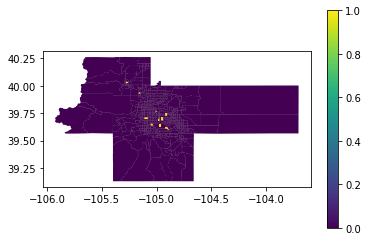

In [195]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['exclusive'].isna()].plot(ax=ax, column = 'exclusive', legend=True)
plt.show()

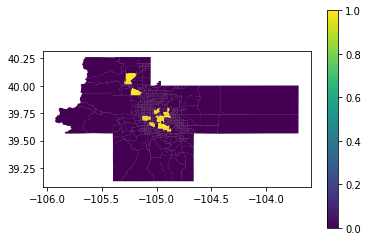

In [196]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['proximity'].isna()].plot(ax=ax, column = 'proximity', legend=True)
plt.show()

#### Mortgage

In [197]:
temp = city_shp_merge.merge(mortgage, on = 'FIPS', how = 'left')
diff = temp['owneroccunits_x'] - temp['owneroccunits_y']
print(abs(diff).sum())
diff = temp['per_rent_17_x'] - temp['per_rent_17_y']/100
print(abs(diff).sum())

# diff = temp['renterocc_units'] - temp['renteroccunits']
# print(abs(diff).sum())

0.0
0.0169076


In [198]:
temp[['per_rent_17_x', 'per_rent_17_y']].head()

,per_rent_17_x,per_rent_17_y
0,0.916172,91.620003
1,0.839925,83.989998
2,0.352852,35.290001
3,0.188168,18.820000
4,0.430059,43.009998


In [199]:
mortgage.columns

Index(['FIPS', 'owneroccunits', 'renterocc_units', 'per_own_17', 'per_rent_17',
       'tot_units', 'applicationrate', 'high_dr20', 'high_dr25', 'high_dr30',
       'low_app_rate'],
      dtype='object')

In [200]:
city_shp_merge = city_shp_merge.merge(mortgage.drop(columns = ['owneroccunits', 'per_rent_17']), on = 'FIPS', how = 'left')
len(city_shp_merge)

677

#### Public housing

In [201]:
city_shp_merge = city_shp_merge.merge(pub_housing, on = 'FIPS', how = 'left')
len(city_shp_merge)
print(len(pub_housing))

214


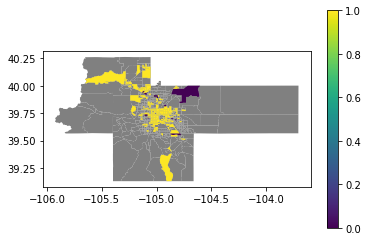

In [202]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['presence_ph_LIHTC'].isna()].plot(ax = ax, column = 'presence_ph_LIHTC', legend=True)
plt.show()

#### Prison

In [203]:
city_shp_merge = city_shp_merge.merge(prison, on = 'FIPS', how = 'left')
len(city_shp_merge)
print(len(prison))

677


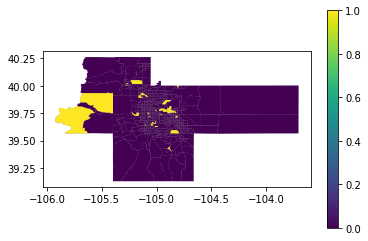

In [204]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['prison_flag'].isna()].plot(ax = ax, column = 'prison_flag', legend=True)
plt.show()

#### Low-income Home-ownership

In [205]:
city_shp_merge = city_shp_merge.merge(LI_HOW_flag, on = 'FIPS', how = 'left')
print(len(LI_HOW_flag))
LI_HOW_flag.head()

677


,FIPS,LItract,homeownership_rm_LItracts,aboverm_homeownership_LItracts
0,08001007801,1,45.465,0.0
1,08001007802,1,45.465,0.0
2,08001007900,1,45.465,0.0
3,08001008000,1,45.465,1.0
4,08001008100,1,45.465,0.0


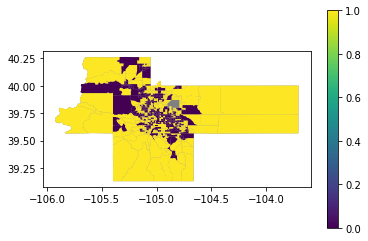

In [206]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['aboverm_homeownership_LItracts'].isna()].plot(ax = ax,
                                                                              column = 'aboverm_homeownership_LItracts',
                                                                              legend=True)
plt.show()

#### Foreclosure

In [207]:
city_shp_merge = city_shp_merge.merge(foreclosure, on = 'FIPS', how = 'left')
print(len(foreclosure))
foreclosure.head()

595


,FIPS,estimated_foreclosure_rate,rm_foreclosure_rate,aboverm_foreclosurerate
0,08001007800,11.2%,4.1,1
1,08001007900,10.5%,4.1,1
2,08001008000,10.5%,4.1,1
3,08001008100,16.7%,4.1,1
4,08001008200,10.3%,4.1,1


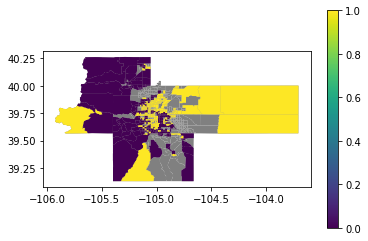

There are 237 NaN census tracts


In [208]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['aboverm_foreclosurerate'].isna()].plot(ax = ax,
                                                                              column = 'aboverm_foreclosurerate',
                                                                              legend=True)
plt.show()
print('There are',city_shp_merge['aboverm_foreclosurerate'].isna().sum(), 'NaN census tracts')

#### Neighborhood income
This includes 55% cut off for AMI predominance & 80-120 AMI cut offs

In [209]:
city_shp_merge = city_shp_merge.merge(neigh_income, on = 'FIPS', how = 'left')
len(city_shp_merge)

677

#### Vacancy

In [210]:
city_shp_merge = city_shp_merge.merge(vacancy, on = 'FIPS', how = 'left')
len(city_shp_merge)
vacancy.head()

,FIPS,vacancy_rate,rm_vacancy,vacancy_rm_flag
0,08001007801,0.011594,0.01461,0
1,08001007802,0.021569,0.01461,1
2,08001007900,0.023976,0.01461,1
3,08001008000,0.000000,0.01461,0
4,08001008100,0.021092,0.01461,1


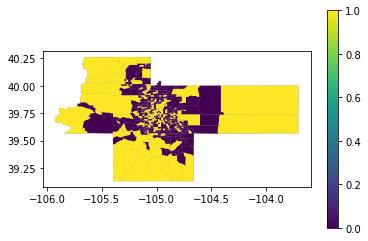

There are 0 NaN census tracts


In [211]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['vacancy_rm_flag'].isna()].plot(ax = ax, column = 'vacancy_rm_flag',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['vacancy_rm_flag'].isna().sum(), 'NaN census tracts')

#### Units vs HH

In [212]:
city_shp_merge = city_shp_merge.merge(housing_units, on = 'FIPS', how = 'left')
len(city_shp_merge)
housing_units.head()

,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
0,08001007801,1348,1380,1191,1372,8.0,13.182200,0.583090,1.0,1.0
1,08001007802,1417,1530,1240,1516,14.0,14.274194,0.923483,1.0,1.0
2,08001007900,1881,2002,1780,1995,7.0,5.674157,0.350877,1.0,1.0
3,08001008000,1797,1846,1726,1899,-53.0,4.113557,-2.790943,1.0,0.0
4,08001008100,727,806,314,361,445.0,131.528662,123.268698,1.0,1.0


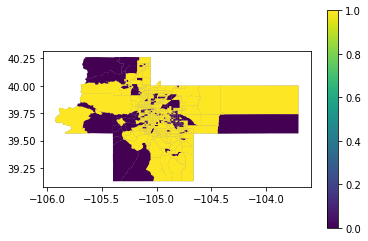

There are 0 NaN census tracts


In [213]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['flag_rm_units_change'].isna()].plot(ax = ax, column = 'flag_rm_units_change',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['flag_rm_units_change'].isna().sum(), 'NaN census tracts')

## Methodology changes - New Approach

### Load affordability Data

In [214]:
### Load file
raw_zillow_aff = pd.read_stata(folder + '0805_aff_ACSchange_zillowrecent_60120_55cut_newapproach.dta')

### Rename trtid10 to FIPS and reformat number
zillow_aff = mf.trtid10_to_FIPS(raw_zillow_aff)

### Keep only records for the census tracts defined in FIPS variable
zillow_aff['FIPS_temp']=zillow_aff['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
zillow_aff = zillow_aff[zillow_aff['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
zillow_aff = zillow_aff.drop(columns='FIPS_temp')

### Keep only relevant columns
zillow_aff = zillow_aff[['FIPS', 'lmh_flag_new', 'aff_change_cat_full',
                         'ab_30pct_ch', 'ab_50pct_ch', 'ab_90percentile_ch']]

zillow_aff.head()

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,lmh_flag_new,aff_change_cat_full,ab_30pct_ch,ab_50pct_ch,ab_90percentile_ch
0,08001007801,predominantly LI,low_rapid_increase,1.0,1.0,1.0
1,08001007802,predominantly LI,low_rapid_increase,1.0,1.0,1.0
2,08001007900,predominantly LI,low_increase,1.0,1.0,1.0
3,08001008000,mixed_low,mixed_low_increase,1.0,1.0,1.0
4,08001008100,predominantly MI,mod_rapid_increase,0.0,0.0,0.0


#### Merge to city_shp_merge file

In [215]:
city_shp_merge = city_shp_merge.merge(zillow_aff, on = 'FIPS', how = 'left')
len(city_shp_merge)
zillow_aff.head()

,FIPS,lmh_flag_new,aff_change_cat_full,ab_30pct_ch,ab_50pct_ch,ab_90percentile_ch
0,08001007801,predominantly LI,low_rapid_increase,1.0,1.0,1.0
1,08001007802,predominantly LI,low_rapid_increase,1.0,1.0,1.0
2,08001007900,predominantly LI,low_increase,1.0,1.0,1.0
3,08001008000,mixed_low,mixed_low_increase,1.0,1.0,1.0
4,08001008100,predominantly MI,mod_rapid_increase,0.0,0.0,0.0


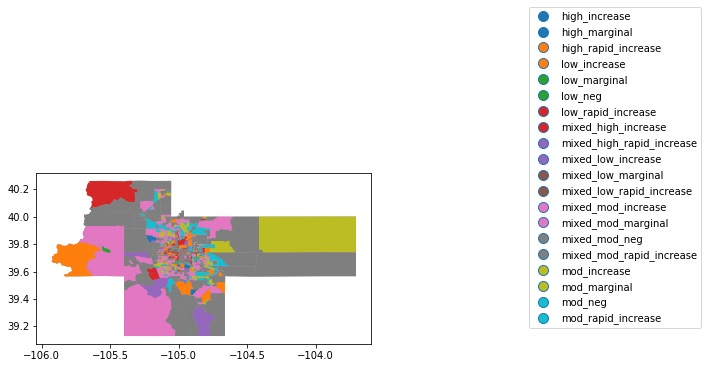

There are 0 NaN census tracts


In [216]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[city_shp_merge['aff_change_cat_full']!='data unavailable'].plot(ax = ax, column = 'aff_change_cat_full',
                                                                        legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 2, 2))
plt.show()
print('There are',city_shp_merge['aff_change_cat_full'].isna().sum(), 'NaN census tracts')

### Load Rail Variables

In [217]:
### Load file
raw_rail = pd.read_stata(folder + 'Denver_Rail_02052019.dta')

### Rename trtid10 to FIPS and reformat number
raw_rail = raw_rail.rename(columns = {'geoid':'trtid10'})
rail = mf.trtid10_to_FIPS(raw_rail)

### Keep only relevant columns
rail = rail[['FIPS', 'rail', 'shape_length', 'shape_area']]

rail.head()

,FIPS,rail,shape_length,shape_area
0,08001007801,0.0,0.044929,0.000068
1,08001007802,0.0,0.044623,0.000067
2,08001007900,0.0,0.059150,0.000172
3,08001008000,0.0,0.059621,0.000205
4,08001008100,1.0,0.070635,0.000284


#### Merge with city_shp_merge

In [218]:
city_shp_merge = city_shp_merge.merge(rail, on = 'FIPS', how = 'left')
len(city_shp_merge)

677

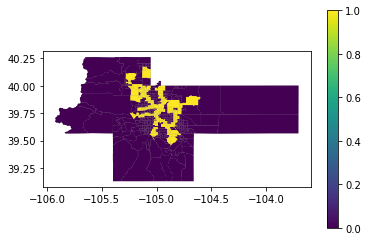

There are 0 NaN census tracts


In [219]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['rail'].isna()].plot(ax = ax, column = 'rail',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['rail'].isna().sum(), 'NaN census tracts')

### Generate percent owner variables

In [220]:
# city_shp_merge['per_own_90'] = city_shp_merge['ohu_90']/city_shp_merge['hu_90']*100
city_shp_merge['per_own_00'] = city_shp_merge['ohu_00']/city_shp_merge['hu_00']*100
city_shp_merge['per_own_17'] = city_shp_merge['ohu_17']/city_shp_merge['hu_17']*100
city_shp_merge[['FIPS','per_own_00', 'per_own_17']].head()

,FIPS,per_own_00,per_own_17
0,08001007801,16.912307,8.382789
1,08001008506,28.776622,16.007533
2,08001008508,92.108586,64.714791
3,08001008546,85.826257,81.183237
4,08001008801,69.574037,56.994144


### Load Low Income Immigration

In [221]:
raw_LI_immigration = pd.read_stata(folder + 'Denver_2010_mover_interpolated.dta')

### Rename trtid10 to FIPS and reformat number
LI_immigration = mf.trtid10_to_FIPS(raw_LI_immigration)

LI_immigration.head()

,FIPS,reg_medinc_10,moveinincd_10,per_limove_10
0,08001007801,34053.0,981.0,0.773552
1,08001007802,34053.0,628.0,0.790571
2,08001007900,34053.0,1587.0,0.802765
3,08001008000,34053.0,569.0,0.779453
4,08001008100,34053.0,203.0,0.759994


#### Merge with city_shp_merge

In [222]:
city_shp_merge = city_shp_merge.merge(LI_immigration, on = 'FIPS', how = 'left')
len(city_shp_merge)

677

### Anchor Institutions

In [223]:
raw_anchor = pd.read_stata(folder + 'RR_042919.dta')

### Rename trtid10 to FIPS and reformat number
anchor = mf.trtid10_to_FIPS(raw_anchor)

### Keep only relevant columns
anchor = anchor[['FIPS', 'hosp_fl', 'uni_fl']]

### Create dummy for anchor institutions
df = anchor
df['anchor_institution'] = 0
df.loc[(df['hosp_fl'] == 1)|(df['uni_fl'] == 1), 'anchor_institution'] = 1

### Keep only records for the census tracts defined in FIPS variable
anchor['FIPS_temp']=zillow_aff['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
anchor = anchor[anchor['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
anchor = anchor.drop(columns='FIPS_temp')

anchor.head()

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']


,FIPS,hosp_fl,uni_fl,anchor_institution
0,13057090100,0.0,0.0,0
1,13057090200,0.0,1.0,1
2,13057090300,0.0,0.0,0
3,13057090400,0.0,0.0,0
4,13057090501,0.0,0.0,0


#### Merge with city_shp_merge

In [224]:
city_shp_merge = city_shp_merge.merge(anchor, on = 'FIPS', how = 'left')
len(anchor)

677

## Additional Data Processing

##### Index US$ to 2017

In [225]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 'hinc_00',
 'hinc_17',
 'countymedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild_17',
 'per_hhwchild_17',
 'per_rent_17',
 'per_units_pre50_17',
 'per_built_00_17',
 'per_rent_17_se',


In [226]:
### Generate real income variables

### To verify final values
raw_int_output = pd.read_stata(folder + 'clean_Denver_merge_081319.dta')


CPI_90_16 = 240.007/130.7
CPI_00_16 = 240.007/172.2
CPI_16_17 = 1.0213
# city_shp_merge = city_shp_merge.rename(columns = {'hinc_90':'real_hinc_90'})### already indexed to 2016?
city_shp_merge['real_hinc_90'] = city_shp_merge['hinc_90']*CPI_16_17
city_shp_merge['real_mhval_90'] = city_shp_merge['mhval_90']*CPI_90_16*CPI_16_17
city_shp_merge['real_mrent_90'] = city_shp_merge['mrent_90']*CPI_90_16*CPI_16_17


# city_shp_merge = city_shp_merge.rename(columns = {'hinc_00':'real_hinc_00'}) ### already indexed to 2016?
city_shp_merge['real_hinc_00'] = city_shp_merge['hinc_00']*CPI_16_17
city_shp_merge['real_mhval_00'] = city_shp_merge['mhval_00']*CPI_00_16*CPI_16_17
city_shp_merge['real_mrent_00'] = city_shp_merge['mrent_00']*CPI_00_16*CPI_16_17

### create variables for consistency with typology code
### Rename for compatibilty with typology code
city_shp_merge['real_hinc_17'] = city_shp_merge['hinc_17']
city_shp_merge['real_mhval_17'] = city_shp_merge['mhval_17']
city_shp_merge['real_mrent_17'] = city_shp_merge['mrent_17']

In [227]:
### Compare values to check whether they were indexed already

In [228]:
city_shp_merge[['FIPS', 'real_hinc_90', 'hinc_90', 'mhval_90', 'real_mhval_90', 'mrent_90', 'real_mrent_90']][city_shp_merge['FIPS']=='08001008000']

,FIPS,real_hinc_90,hinc_90,mhval_90,real_mhval_90,mrent_90,real_mrent_90
93,08001008000,55416.137469,54260.391138,61799.99981,115901.785523,444.999999,834.567873


In [229]:
city_shp_merge[['FIPS', 'real_hinc_00', 'hinc_00', 'mhval_00', 'real_mhval_00', 'mrent_00', 'real_mrent_00']][city_shp_merge['FIPS']=='08001008000']

,FIPS,real_hinc_00,hinc_00,mhval_00,real_mhval_00,mrent_00,real_mrent_00
93,08001008000,56503.629097,55325.202289,114600.0,163128.074837,615.0,875.425533


In [230]:
city_shp_merge[['FIPS', 'real_hinc_17', 'real_mhval_17', 'real_mrent_17']][city_shp_merge['FIPS']=='08001007801']

,FIPS,real_hinc_17,real_mhval_17,real_mrent_17
0,08001007801,24420.0,174300.0,818.0


In [231]:
raw_int_output[['trtid10', 'real_hinc_90', 'real_mhval_90', 'real_mrent_90', 'real_hinc_00', 'real_mhval_00', 'real_mrent_00', 'real_hinc_17', 'real_mhval_17', 'real_mrent_17']].head()

,trtid10,real_hinc_90,real_mhval_90,real_mrent_90,real_hinc_00,real_mhval_00,real_mrent_00,real_hinc_17,real_mhval_17,real_mrent_17
0,08001007801,10263.929688,99398.320312,517.621399,16734.576172,149036.375000,750.164001,24420.0,174300.0,818.0
1,08001007802,12618.243164,99398.312500,517.621460,20573.107422,149036.375000,750.164001,28341.0,133800.0,820.0
2,08001007900,38703.406250,99960.945312,628.272400,42286.257812,156438.375000,835.571655,38297.0,161000.0,902.0
3,08001008000,55416.328125,115902.187500,834.570740,56503.824219,163128.640625,875.428589,52219.0,183600.0,1002.0
4,08001008100,51400.875000,NaN,864.577820,49987.378906,14233.187500,1026.315430,39156.0,NaN,1461.0


### OTHER VARIABLES THAT NEED TO BE FOUND IN ORIGINAL DATASETS

In [232]:
# ### These variables needed to be pulled out of the original merge file, because they're not incorporated here
# ### Rename trtid10 to FIPS and reformat number
# int_output_merge = mf.trtid10_to_FIPS(raw_int_output)

# # columns = ['FIPS', 'mhval_90', 'mrent_90', 'mhval_00', 'mrent_00', 'hh_00', 'hh_90', 'tot_jobs', 'larea',
# #            'per_col_00', 'per_col_90', 'per_rent_90', 'per_rent_00']

# # columns = ['FIPS', 'hh_90', 'per_col_90']
# # city_shp_merge = city_shp_merge.merge(int_output_merge[columns], on = 'FIPS', how = 'left')

# # columns = ['FIPS', 'pop_90']
# # # columns = ['FIPS', 'pop_17', 'pop_17_se', 'hh_17', 'pop_90', 'mhval_17', 'mhval_17_se',
# #            'mrent_17', 'mrent_17_se', 'per_rent_17_se', 'per_col_17', 'per_col_17_se',
# #            'rhu_17', 'rhu_17_se', 'hu_17', 'hinc_17_se', 'per_nonwhite_17', 'per_units_pre50_17', 'per_built_00_17',
# #         'per_nhblk_17', 'per_asian_17', 'per_hisp_17']

# city_shp_merge = city_shp_merge.merge(output[columns], on = 'FIPS', how = 'left')

# len(city_shp_merge)

In [233]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 'hinc_00',
 'hinc_17',
 'countymedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild_17',
 'per_hhwchild_17',
 'per_rent_17',
 'per_units_pre50_17',
 'per_built_00_17',
 'per_rent_17_se',


In [234]:
### Renamed the variables ---- WHY?
city_shp_merge = city_shp_merge.rename(columns = {'vli2017':'vli_17',
                                                  'vli2000':'vli_00',
                                                  'vli1990':'vli_90',
                                                  'li1990':'li_90',
                                                  'li2000':'li_00',
                                                  'li2017':'li_17'})

df = city_shp_merge
df['vli_flag'] = 0
df.loc[(df['vli_17'] > 0.5), 'vli_flag'] = 1

# #### Weird thing about OLD LI data is that OLD li=50-80% AMI since vli=<50%AMI, need a var for all<80%
df['per_all_li_17'] = df['vli_17'] + df['li_17']
df['per_all_li_17'] = np.where((df['vli_17'].isna())&(df['li_17'].isna()), np.nan, df['per_all_li_17'])
df['per_all_li_00'] = df['vli_00'] + df['li_00']
df['per_all_li_00'] = np.where((df['vli_00'].isna())&(df['li_00'].isna()), np.nan, df['per_all_li_00'])
df['per_all_li_90'] = df['vli_90'] + df['li_90']
df['per_all_li_90'] = np.where((df['vli_90'].isna())&(df['li_90'].isna()), np.nan, df['per_all_li_90'])

#*The OLD low-inc vars are also proportions, so need to make them counts
#### ***** HH data needs to be uploaded *****
df['all_li_count_17'] = df['per_all_li_17']*df['hh_17']
df['all_li_count_00'] = df['per_all_li_00']*df['hh_00']
df['all_li_count_90'] = df['per_all_li_90']*df['hh_90']

print(df['per_all_li_17'].isna().sum())
print(df['vli_17'].isna().sum())
print(df['li_17'].isna().sum())

7
7
7


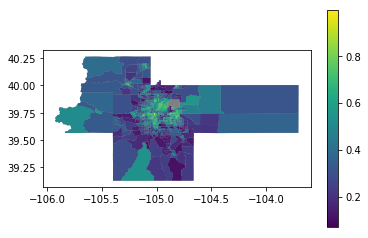

There are 7 NaN census tracts


In [235]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['per_all_li_17'].isna()].plot(ax = ax, column = 'per_all_li_17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['per_all_li_17'].isna().sum(), 'NaN census tracts')

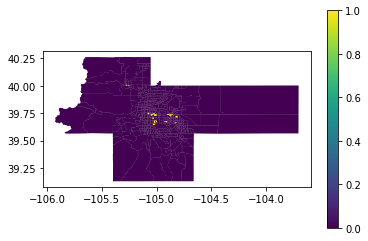

There are 0 NaN census tracts


In [236]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['vli_flag'].isna()].plot(ax = ax, column = 'vli_flag',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['vli_flag'].isna().sum(), 'NaN census tracts')

##### Population flag and other pop data

In [237]:
df = city_shp_merge

### Create population dummy, 1 for pop >= 500
df['popflag17'] = np.where(df['pop_17']<500, 0, 1)

# ### Old income measures - what is this?
# weight_inc = (df['real_hinc_17']*(df['pop_17']/8522948)).sum() ### What is this and what is 8,522,948
# print(weight_inc)
# print(df['hinc_17'].describe())
# print(df['hinc_17'][df['hinc_17']<=79000].describe())  ### Why is this showing?

# ** POPLOSS & VLI FLAG
df['poploss_90_00'] = df['pop_00'] - df['pop_90']
df['poploss_00_17'] = df['pop_17'] - df['pop_00']
df['poploss_90_17'] = df['pop_17'] - df['pop_90']

df['pctch_poploss_90_00'] = (df['pop_00'] - df['pop_90'])/df['pop_90']
df['pctch_poploss_00_17'] = (df['pop_17'] - df['pop_00'])/df['pop_00']
df['pctch_poploss_90_17'] = (df['pop_17'] - df['pop_90'])/df['pop_90']

city_shp_merge.head()

,FIPS,COUNTYFP,geometry,pop_90,nhwhite_90,nhblk_90,asian_90,hisp_90,hh_90,hinc_90,...,all_li_count_17,all_li_count_00,all_li_count_90,popflag17,poploss_90_00,poploss_00_17,poploss_90_17,pctch_poploss_90_00,pctch_poploss_00_17,pctch_poploss_90_17
0,08001007801,001,"POLYGON ((-104.884652 39.743807, -104.875223 3...",1780.317747,952.732400,583.571023,23.324899,92.402483,940.621395,10049.832932,...,1110.750555,855.342603,642.104066,1,1977.682253,654.000000,2631.682253,1.110859,0.174029,1.478209
1,08001008506,001,"POLYGON ((-104.98987 39.914064, -104.986556 39...",4180.719340,3354.965338,112.830425,79.813817,592.777590,1816.461671,44452.163945,...,1871.432660,1003.819786,644.359638,1,236.280660,1962.000000,2198.280660,0.056517,0.444193,0.525814
2,08001008508,001,"POLYGON ((-104.958888 39.907543, -104.958158 3...",1978.925398,1660.292256,35.742705,22.666106,243.660638,688.265023,31626.172943,...,773.285149,331.230723,124.336120,1,2771.074602,1236.000000,4007.074602,1.400293,0.260211,2.024874
3,08001008546,001,"POLYGON ((-104.940213 39.92834999999999, -104....",666.870604,559.636882,1.742693,11.850314,85.856686,221.322039,9167.364423,...,332.617116,116.967756,10.643669,1,1531.976529,1237.152867,2769.129396,2.297262,0.562637,4.152424
4,08001008801,001,"POLYGON ((-104.924155 39.82723, -104.918476 39...",3817.999987,2488.999992,26.000000,7.000000,1295.999996,1311.999996,43899.260724,...,1023.725289,783.858835,491.935404,1,989.000013,1066.000000,2055.000013,0.259036,0.221760,0.538240


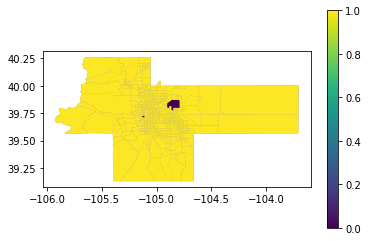

There are 0 NaN census tracts


In [238]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['popflag17'].isna()].plot(ax = ax, column = 'popflag17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['popflag17'].isna().sum(), 'NaN census tracts')

C:\Users\Gaby\Anaconda3\lib\site-packages\matplotlib\colors.py:956: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Users\Gaby\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


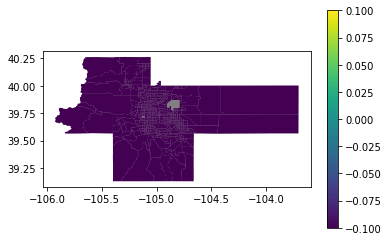

There are 3 NaN census tracts


In [239]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['pctch_poploss_00_17'].isna()].plot(ax = ax, column = 'pctch_poploss_00_17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['pctch_poploss_00_17'].isna().sum(), 'NaN census tracts')

#### Employment Density & Housing Unit Density

In [240]:
df = city_shp_merge

### Employment & Housing Unit Density
df['empd_17'] = df['tot_jobs']/df['larea']
df['density_17'] = df['hu_17']/df['larea']

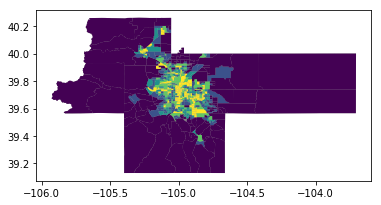

There are 4 NaN census tracts


In [241]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['empd_17'].isna()].plot(ax = ax, column = 'empd_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['empd_17'].isna().sum(), 'NaN census tracts')

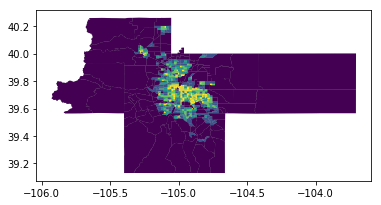

There are 0 NaN census tracts


In [242]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['density_17'].isna()].plot(ax = ax, column = 'density_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['density_17'].isna().sum(), 'NaN census tracts')

#### Some variation coefficients

In [243]:
### Variation Coefficient
### House value 2017
df['mhval_17_cv'] = df['mhval_17_se']/df['mhval_17']
df['mhval_17_flag15'] = np.where(df['mhval_17_cv']>.15, 1, 0)
df['mhval_17_flag30'] = np.where(df['mhval_17_cv']>.30, 1, 0)

### House rent 2017
df['mrent_17_cv'] = df['mrent_17_se']/df['mrent_17']
df['mrent_17_flag15'] = np.where(df['mrent_17_cv']>.15, 1, 0)
df['mrent_17_flag30'] = np.where(df['mrent_17_cv']>.30, 1, 0)

### Percentage of renters 2017
df['per_rent_17_cv'] = df['per_rent_17_se']/df['per_rent_17']
df['per_rent_17_flag15'] = np.where(df['per_rent_17_cv']>.15, 1, 0)
df['per_rent_17_flag30'] = np.where(df['per_rent_17_cv']>.30, 1, 0)

### Percentage COL 2017 - what is this?!
df['per_col_17_cv'] = df['per_col_17_se']/df['per_col_17']
df['per_col_17_flag15'] = np.where(df['per_col_17_cv']>.15, 1, 0)
df['per_col_17_flag30'] = np.where(df['per_col_17_cv']>.30, 1, 0)

### RHU 2017 - what is this?!
df['rhu_17_cv'] = df['rhu_17_se']/df['rhu_17']
df['rhu_17_flag15'] = np.where(df['rhu_17_cv']>.15, 1, 0)
df['rhu_17_flag30'] = np.where(df['rhu_17_cv']>.30, 1, 0)

### Population 2017
df['pop_17_cv'] = df['pop_17_se']/df['pop_17']
df['pop_17_flag15'] = np.where(df['pop_17_cv']>.15, 1, 0)
df['pop_17_flag30'] = np.where(df['pop_17_cv']>.30, 1, 0)

### HH Income 2017
df['hinc_17_cv'] = df['hinc_17_se']/df['hinc_17']
df['hinc_17_flag15'] = np.where(df['hinc_17_cv']>.15, 1, 0)
df['hinc_17_flag30'] = np.where(df['hinc_17_cv']>.30, 1, 0)

In [244]:
city_shp_merge[['mhval_17_cv', 'per_rent_17_cv', 'per_col_17_cv', 'rhu_17_cv', 'pop_17_cv', 'hinc_17_cv']].describe()

,mhval_17_cv,per_rent_17_cv,per_col_17_cv,rhu_17_cv,pop_17_cv,hinc_17_cv
count,661.000000,669.000000,671.000000,677.000000,677.000000,667.000000
mean,0.056800,0.006538,0.005587,inf,inf,0.086670
std,0.044277,0.006899,0.004214,NaN,NaN,0.040229
min,0.014217,0.001331,0.002089,0.033988,0.000000,0.024727
25%,0.032344,0.004150,0.003974,0.088384,0.036523,0.058688
50%,0.044161,0.005648,0.004968,0.131975,0.045289,0.078042
75%,0.063423,0.007712,0.006141,0.226830,0.055106,0.104788
max,0.426889,0.166797,0.078016,inf,inf,0.334926


In [245]:
city_shp_merge[['pop_17', 'rhu_17']].describe()

,pop_17,rhu_17
count,677.000000,677.000000
mean,4540.639586,643.753323
std,1809.121233,561.993188
min,0.000000,0.000000
25%,3356.000000,246.000000
50%,4393.000000,496.000000
75%,5598.000000,868.000000
max,12640.000000,3968.000000


#### Income breakdowns for year 2000

In [246]:
city_shp_merge['real_hinc_00'].head()

0    16734.517134
1    53087.951974
2    95519.756578
3    20960.760517
4    50062.259529
Name: real_hinc_00, dtype: float64

In [247]:
raw_hhincome_2000 = pd.read_stata(folder + 'hhinc_010319.dta')
hhincome_2000 = mf.trtid10_to_FIPS(raw_hhincome_2000)

hhincome_2000 = hhincome_2000[['FIPS', 'hinc_00']]
### Not going to use the countymedian_income. Will ue region median income instead.
### This value is provided in "inc_groups_hh by income_testing cutoffs_053119"
### Madeline defined RMI for 2017, but not for 2000 - how did she do it?

In [248]:
raw_income_2000 = pd.read_stata(folder + '2000_incomedata.dta')
income_group = raw_income_2000.merge(hhincome_2000, on = 'FIPS', how = 'left')

In [249]:
income_group.columns

Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'T090_001',
       'T090_002', 'T090_003', 'T090_004', 'T090_005', 'T090_006', 'T090_007',
       'T090_008', 'T090_009', 'T090_010', 'T090_011', 'T090_012', 'T090_013',
       'T090_014', 'T090_015', 'T090_016', 'T090_017', 'hinc_00'],
      dtype='object')

In [250]:
### Keep only relevant columns
# income_group = income_group.drop(columns = ['NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT'])

### Rename variables
income_group = income_group.rename(columns = {'hinc_00':'med_inc',
                                              'T090_001':'denominator_00', ### What is this number? - Total HH?
                                              'T090_002':'I_10000',
                                              'T090_003':'I_15000',
                                              'T090_004':'I_20000',
                                              'T090_005':'I_25000',
                                              'T090_006':'I_30000',
                                              'T090_007':'I_35000',
                                              'T090_008':'I_40000',
                                              'T090_009':'I_45000',
                                              'T090_010':'I_50000',
                                              'T090_011':'I_60000',
                                              'T090_012':'I_75000',
                                              'T090_013':'I_100000',
                                              'T090_014':'I_125000',
                                              'T090_015':'I_150000',
                                              'T090_016':'I_200000',
                                              'T090_017':'I_201'})
income_group.columns

Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201', 'med_inc'],
      dtype='object')

#### Determining AMI - Look at other code

In [251]:
# ****** DETERMINING AMI *********
# * issue - how do I assign AMI - use Madeline's median of median method (mentioned in Neighb income read.me)
# * accidentally deleted a file from Neighb Income Level Archive file while looking for median-of-tract-medians method
# * intended to run my own median-of-medians method to determine 2000 AMI >> Do file to be found in:
# 	* Typologies > Master Datasets > Updated Typologies Summer 2019 ///
# 		* > Accessory Typology Processing> Regional AMIs - Median of Medians Method

# *Kamene definition: Atlanta - $ 51,760.11
# *Kamene definition: Chicago - $ 42,917
# *Kamene definition: Denver - $ 65,785.05
# *Kamene definition: Memphis - $ 44,560.60


# * CODE from Income Interpolation 1990 2000 2016.do
reg_med_inc_00 = 65785.05

#### Creates income cutoffs

In [252]:
income_group.describe()

,denominator_00,I_10000,I_15000,I_20000,I_25000,I_30000,I_35000,I_40000,I_45000,I_50000,I_60000,I_75000,I_100000,I_125000,I_150000,I_200000,I_201,med_inc
count,1247.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1247.000000
mean,1330.639936,63.341890,33.747558,45.622866,47.161233,50.223139,54.822130,57.474500,57.551025,58.297542,110.308735,147.253387,197.925012,130.353403,98.289976,89.815156,86.321657,60870.888068
std,654.668533,66.113553,33.924239,41.777842,39.568469,40.855009,44.230170,43.634043,41.144367,40.825216,70.269949,85.419319,112.273438,82.683062,70.954841,82.961049,110.838461,35453.065260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,894.000000,16.560300,9.420000,13.110000,15.640000,17.840000,20.125979,23.871147,26.300364,28.945794,58.530000,86.491687,112.180000,64.436336,42.160000,27.340000,19.350000,39643.617044
50%,1329.000000,41.672087,22.970000,34.500000,38.180000,41.060000,46.920000,48.950000,50.987891,51.750000,103.617543,141.627933,195.160000,121.520000,84.040000,63.000000,45.200000,55296.383327
75%,1753.000000,87.630000,46.940000,66.930000,69.128563,73.849214,80.040000,82.400005,81.330000,83.414880,150.350039,201.440000,273.580000,186.900000,143.180000,129.400000,105.900000,79503.157452
max,3652.000000,423.660000,212.220000,247.020000,247.020000,236.360000,250.470000,280.300000,254.250000,238.050000,464.500000,475.685523,570.473457,437.940000,398.918672,489.650000,887.426695,306413.290560


In [253]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    print(i)
    column.append('prop_'+i)
    income_group['prop_'+i] = income_group['I_'+i]/income_group['denominator_00']
print(column)

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000
200000
['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


###### Determines 80% cutoff

In [254]:
### 80% cutoff of the regional median income
df = income_group
reg_med_inc80_00 = 0.8*reg_med_inc_00

df['inc80_cumulative'] = 0
df['inc80_00'] = 0

### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)
    
df = df.drop(columns = ['inc80_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Determines 120% cutoff

In [255]:
df = income_group
reg_med_inc120_00 = 1.2*reg_med_inc_00

df['inc120_cumulative'] = 0
df['inc120_00'] = 0


### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)
    
df = df.drop(columns = ['inc120_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Generate share of each income group

In [256]:
income_group['low_80120_00'] = income_group['inc80_00']
income_group['mod_80120_00'] = income_group['inc120_00'] - income_group['inc80_00']
income_group['high_80120_00'] = 1 - income_group['inc120_00']
income_group.head(3)

,FIPS,NAME,QName,NATION,STATE,COUNTY,CT,denominator_00,I_10000,I_15000,...,prop_125000,prop_150000,prop_200000,inc80_cumulative,inc80_00,inc120_cumulative,inc120_00,low_80120_00,mod_80120_00,high_80120_00
0,08001007801,Census Tract 78.01,"Census Tract 78.01, Adams County, Colorado",00,08,001,007801,1213.791836,159.084779,83.20709,...,0.023947,0.013769,0.000000,0.998152,0.704686,0.998152,0.901312,0.704686,0.196626,0.098688
1,08001007802,Census Tract 78.02,"Census Tract 78.02, Adams County, Colorado",00,08,001,007802,1492.208164,195.575221,102.29291,...,0.023947,0.013769,0.000000,0.998152,0.704686,0.998152,0.901312,0.704686,0.196626,0.098688
2,08001007900,Census Tract 79,"Census Tract 79, Adams County, Colorado",00,08,001,007900,1948.000000,162.840000,87.88000,...,0.045257,0.027146,0.033604,0.945503,0.615280,0.945503,0.799592,0.615280,0.184313,0.200408


In [257]:
### Excludes CT without data
### According to stata code comment, I should have 25 CT without data, but I have zero

df = income_group
df['validsample'] = np.where((df['inc80_00'] == 0)|(df['inc120_00'] == 0), 0, 1)
df['validsample'].describe()

count    1249.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: validsample, dtype: float64

In [258]:
df = income_group

### Low income
df['low_pdmt_80120'] = np.where((df['low_80120_00']>=0.5)&(df['mod_80120_00']<0.4)&(df['high_80120_00']<0.4),1,0)
df['low_pdmt_80120'][df['validsample']==0] = 0

## High income
df['high_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']<0.4)&(df['high_80120_00']>=0.5),1,0)
df['high_pdmt_80120'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']>=0.5)&(df['high_80120_00']<0.4),1,0)
df['mod_pdmt_80120'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_80120'] = np.where((df['low_80120_00']>=0.4)&(df['mod_80120_00']<0.35)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_low_80120'][df['validsample']==0] = 0
### Mixed-Moderate income
df['mix_mod_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']>=0.4)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_mod_80120'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']<0.35)&(df['high_80120_00']>=0.4)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_high_80120'][df['validsample']==0] = 0

### Mixed-Low-Mod income
df['mix_l_m_80120'] = np.where((df['low_80120_00']>=0.35)&(df['mod_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_m_80120'][df['validsample']==0] = 0

### Mixed-Mod-High income
### Mixed-Low-Mod income
df['mix_m_h_80120'] = np.where((df['mod_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_m_h_80120'][df['validsample']==0] = 0

### Mixed-Low-High income
df['mix_l_h_80120'] = np.where((df['low_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_h_80120'][df['validsample']==0] = 0

### Mixed-Uni income
df['mix_uni_80120'] = np.where((df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0)&
                               (df['mix_l_m_80120']==0)&(df['mix_m_h_80120']==0)&(df['mix_l_h_80120']==0),1,0)
df['mix_uni_80120'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is

###### Compute income categories

In [259]:
income_group['inc_cat_80120'] = 0
income_group.loc[income_group['low_pdmt_80120']==1, 'inc_cat_80120'] = 1
income_group.loc[income_group['mix_low_80120']==1, 'inc_cat_80120'] = 2
income_group.loc[income_group['mix_l_m_80120']==1, 'inc_cat_80120'] = 3
income_group.loc[income_group['mix_l_h_80120']==1, 'inc_cat_80120'] = 4
income_group.loc[income_group['mix_uni_80120']==1, 'inc_cat_80120'] = 5
income_group.loc[income_group['mod_pdmt_80120']==1, 'inc_cat_80120'] = 6
income_group.loc[income_group['mix_mod_80120']==1, 'inc_cat_80120'] = 7
income_group.loc[income_group['mix_m_h_80120']==1, 'inc_cat_80120'] = 8
income_group.loc[income_group['mix_high_80120']==1, 'inc_cat_80120'] = 9
income_group.loc[income_group['high_pdmt_80120']==1, 'inc_cat_80120'] = 10
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [260]:
income_group.groupby('inc_cat_80120')['FIPS'].count()

inc_cat_80120
1     329
2     133
4     133
5      37
9     128
10    489
Name: FIPS, dtype: int64

###### Drop prop_XXXX columns

In [261]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    column.append('prop_'+i)
print(column)

income_group = income_group.drop(columns = column)
income_group.columns

['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201', 'med_inc',
       'inc80_cumulative', 'inc80_00', 'inc120_cumulative', 'inc120_00',
       'low_80120_00', 'mod_80120_00', 'high_80120_00', 'validsample',
       'low_pdmt_80120', 'high_pdmt_80120', 'mod_pdmt_80120', 'mix_low_80120',
       'mix_mod_80120', 'mix_high_80120', 'mix_l_m_80120', 'mix_m_h_80120',
       'mix_l_h_80120', 'mix_uni_80120', 'inc_cat_80120'],
      dtype='object')

##### New Methodology

In [262]:
### New methodology (on 80/120) where we use 55%+ to define predominantly low/predominantly mod/predominantly high;
### then if % is no greater than X, define category based on median hh income

df = income_group

### Low income
df['low_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']>=0.55)&(df['mod_80120_00']<0.45)&(df['high_80120_00']<0.45),1,0)
df['low_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

## High income
df['high_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']<0.45)&(df['high_80120_00']>=0.55),1,0)
df['high_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']>=0.55)&(df['high_80120_00']<0.45),1,0)
df['mod_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']<reg_med_inc80_00),1,0)
df['mix_low_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Moderate income
df['mix_mod_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc80_00)&
                                              (df['med_inc']<reg_med_inc120_00),1,0)
df['mix_mod_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc120_00),1,0)
df['mix_high_55cut_80120_medhhinc'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value

###### Compute income categories

In [263]:
income_group['low_pdmt_55cut_80120_medhhinc'] = 0
income_group.loc[income_group['low_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 1
income_group.loc[income_group['mix_low_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 2
income_group.loc[income_group['mod_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 3
income_group.loc[income_group['mix_mod_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 4
income_group.loc[income_group['mix_high_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 5
income_group.loc[income_group['high_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 6
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [264]:
income_group.groupby('inc_cat_55cut_80120_medhhinc')['FIPS'].count()

inc_cat_55cut_80120_medhhinc
2.0    247
4.0    325
5.0     55
6.0    404
Name: FIPS, dtype: int64

###### Merge with master file

In [265]:
### Keep only records for the census tracts defined in FIPS variable
income_group['FIPS_temp']=income_group['FIPS'].str[0:5]
str_FIPS=['0'+str(i) for i in FIPS]
print(str_FIPS)
income_group = income_group[income_group['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_group = income_group.drop(columns='FIPS_temp')

### Keep only relevant columns
income_group = income_group.drop(columns = ['NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'denominator_00',
                                             'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000', 'I_35000',
                                             'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000', 'I_100000',
                                             'I_125000', 'I_150000', 'I_200000', 'I_201',
                                             'med_inc', 'inc80_cumulative', 'inc80_00', 'inc120_cumulative', 'inc120_00'])

### Rename to differentiate from 2017 data loaded in neigh_income file
income_group = income_group.rename(columns = {'low_pdmt_80120':'low_pdmt_80120_00',
                                                'high_pdmt_80120':'high_pdmt_80120_00',
                                                'mod_pdmt_80120':'mod_pdmt_80120_00',
                                                'inc_cat_55cut_80120_medhhinc':'inc_cat_55cut_80120_medhhinc_00',
                                                'mix_mod_55cut_80120_medhhinc':'mix_mod_55cut_80120_medhhinc_00',
                                                'mix_low_55cut_80120_medhhinc':'mix_low_55cut_80120_medhhinc_00',
                                                'mix_high_55cut_80120_medhhinc':'mix_high_55cut_80120_medhhinc_00',
                                                'mod_pdmt_55cut_80120_medhhinc':'mod_pdmt_55cut_80120_medhhinc_00',
                                                'high_pdmt_55cut_80120_medhhinc':'high_pdmt_55cut_80120_00',
                                                'low_pdmt_55cut_80120_medhhinc':'low_pdmt_55cut_80120_medhhinc_00',
                                                'inc_cat_80120':'inc_cat_80120_00',
                                                'mix_low_80120':'mix_low_80120_00',
                                                'mix_mod_80120':'mix_mod_80120_00',
                                                'mix_high_80120':'mix_high_80120_00',
                                                'mix_l_m_80120':'mix_l_m_80120_00',
                                                'mix_l_h_80120':'mix_l_h_80120_00',
                                                'mix_m_h_80120':'mix_m_h_80120_00',
                                                'mix_uni_80120':'mix_uni_80120_00'})

### Merge files
city_shp_merge = city_shp_merge.merge(income_group, on = 'FIPS', how = 'left')
print(reg_med_inc_00, reg_med_inc120_00, reg_med_inc80_00)

['08001', '08005', '08013', '08014', '08019', '08031', '08035', '08047', '08059']
65785.05 78942.06 52628.04000000001


In [266]:
income_group.columns

Index(['FIPS', 'low_80120_00', 'mod_80120_00', 'high_80120_00', 'validsample',
       'low_pdmt_80120_00', 'high_pdmt_80120_00', 'mod_pdmt_80120_00',
       'mix_low_80120_00', 'mix_mod_80120_00', 'mix_high_80120_00',
       'mix_l_m_80120_00', 'mix_m_h_80120_00', 'mix_l_h_80120_00',
       'mix_uni_80120_00', 'inc_cat_80120_00',
       'low_pdmt_55cut_80120_medhhinc_00', 'high_pdmt_55cut_80120_00',
       'mod_pdmt_55cut_80120_medhhinc_00', 'mix_low_55cut_80120_medhhinc_00',
       'mix_mod_55cut_80120_medhhinc_00', 'mix_high_55cut_80120_medhhinc_00',
       'inc_cat_55cut_80120_medhhinc_00'],
      dtype='object')

In [267]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 'hinc_00',
 'hinc_17',
 'countymedian_income90',
 'vli_90',
 'li_90',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'vli_00',
 'li_00',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'vli_17',
 'li_17',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild_17',
 'per_hhwchild_17',
 'per_rent_17',
 'per_units_pre50_17',
 'per_built_00_17',
 'per_rent_17_se',
 'col_

In [268]:
city_shp_merge.groupby('inc_cat_80120_00').count()['FIPS']

inc_cat_80120_00
1     121
2      69
4      67
5      15
9      58
10    347
Name: FIPS, dtype: int64

In [269]:
city_shp_merge.groupby('inc_cat_55cut_80120_medhhinc_00').count()['FIPS']

inc_cat_55cut_80120_medhhinc_00
2.0     81
4.0    180
5.0     36
6.0    302
Name: FIPS, dtype: int64

In [270]:
city_shp_merge.groupby('inc_cat_55cut_80120_medhhinc').count()['FIPS']

inc_cat_55cut_80120_medhhinc
1.0    151
2.0     57
4.0    229
5.0     46
6.0    187
Name: FIPS, dtype: int64

In [271]:
city_shp_merge['inc_cat_80120_00'].describe()

count    677.000000
mean       6.785820
std        3.859198
min        1.000000
25%        2.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: inc_cat_80120_00, dtype: float64

In [272]:
city_shp_merge.groupby('inc_cat_80120_00').count()['FIPS']

inc_cat_80120_00
1     121
2      69
4      67
5      15
9      58
10    347
Name: FIPS, dtype: int64

In [273]:
# print('ORIGINAL METHODOLOGY - 2000 CATEGORIES')
# ax = city_shp_merge.plot(color = 'grey')
# city_shp_merge[~city_shp_merge['inc_cat_80120_00'].isna()].plot(ax = ax, column = 'inc_cat_80120_00', legend = True)
# # plt.show()
# # print('There are',str(city_shp_merge['inc_cat_80120_00'].isna().sum()), 'NaN census tracts')

NEW METHODOLOGY - 2000 CATEGORIES


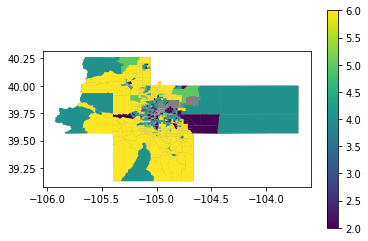

There are 78 NaN census tracts


In [274]:
print('NEW METHODOLOGY - 2000 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_55cut_80120_medhhinc_00'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc_00', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_55cut_80120_medhhinc_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2017 CATEGORIES


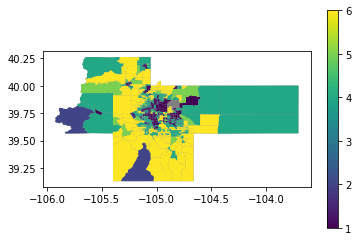

There are 7 NaN census tracts


In [275]:
print('NEW METHODOLOGY - 2017 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_55cut_80120_medhhinc'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_55cut_80120_medhhinc'].isna().sum(), 'NaN census tracts')

## Rename variables and clean code for doing typology run

In [276]:
## Rename Variables
city_shp_merge = city_shp_merge.rename(columns = {'Fstate':'state_str',
                                                 'Fcounty':'county_str',
                                                 'Ftract':'tract_str',
                                                 'per_owners_90':'per_own_90',
                                                 'per_owners_00':'per_own_00',
                                                 'per_owners_17':'per_own_17',
                                                 'high_dr20':'high_denialrate20',
                                                 'high_dr25':'high_denialrate25',
                                                 'high_dr30':'high_denialrate30',
                                                 'exclusive':'exclusive_tract',
                                                 'per_limove17':'per_limove_17'})
# print("ERROR - ['Fstate' 'Fcounty' 'Ftract' 'per_owners_90' 'per_owners_00'] not in index")

### Drop Variables
# city_shp_merge = city_shp_merge.drop(columns=['geo_stusab', 'geo_sumlev', 'geo_geocomp', 'geo_fileid', 'geo_logrecno',
#                                               'geo_us', 'geo_region'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_division', 'geo_statece', 'geo_state', 'geo_county', 'geo_cousub',
#                                               'geo_place'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_placese', 'geo_blkgrp', 'geo_concit', 'geo_aianhh', 'geo_aianhhfp',
#                                               'geo_aihhtli', 'geo_aitsce'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_aits', 'geo_anrc', 'geo_cbsa', 'geo_csa', 'geo_metdiv',
#                                               'geo_macc', 'geo_memi', 'geo_necta'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_cnecta', 'geo_nectadiv', 'geo_ua', 'geo_uacp', 'geo_cdcurr',
#                                               'geo_sldu', 'geo_sldl', 'geo_vtd', 'geo_zcta3'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_zcta5', 'geo_submcd', 'geo_sdelm', 'geo_sdsec', 'geo_sduni',
#                                               'geo_ur', 'geo_pci', 'geo_taz', 'geo_uga', 'geo_bttr', 'geo_btbg',
#                                               'geo_puma5', 'geo_puma1', 'geo_nation', 'geo_ct'])

# city_shp_merge = city_shp_merge.drop(columns=['acs16_5yr_b11005001', 'acs16_5yr_b11005003', 'acs16_5yr_b11005004',
#                                               'acs16_5yr_b11005005', 'acs16_5yr_b11005006', 'acs16_5yr_b11005007',
#                                               'acs16_5yr_b11005008', 'acs16_5yr_b11005009', 'acs16_5yr_b11005010',
#                                               'acs16_5yr_b11005011', 'acs16_5yr_b11005012', 'acs16_5yr_b11005013',
#                                               'acs16_5yr_b11005014', 'acs16_5yr_b11005015', 'acs16_5yr_b11005016',
#                                               'acs16_5yr_b11005017', 'acs16_5yr_b11005018', 'acs16_5yr_b11005019',
#                                               'acs16_5yr_b11005001s', 'acs16_5yr_b11005003s', 'acs16_5yr_b11005004s',
#                                               'acs16_5yr_b11005005s', 'acs16_5yr_b11005006s', 'acs16_5yr_b11005007s',
#                                               'acs16_5yr_b11005008s', 'acs16_5yr_b11005009s', 'acs16_5yr_b11005010s',
#                                               'acs16_5yr_b11005011s', 'acs16_5yr_b11005012s', 'acs16_5yr_b11005013s',
#                                               'acs16_5yr_b11005014s', 'acs16_5yr_b11005015s', 'acs16_5yr_b11005016s',
#                                               'acs16_5yr_b11005017s', 'acs16_5yr_b11005018s', 'acs16_5yr_b11005019s',
#                                               'acs16_5yr_b11005003s'])

#### This seems like a waste of time - should only pull in variables that actually matter
#### instead of having to do all this cleaning.

#### The following variables have not been coded for dropping
# tot_00 male_00 none_m00 nursery_4th_m00 _5th_6th_m00 _7th_8th_m00 _9th_m00 _10th_m00 _11th_m00 _12th_nd_m00 hs_grad_m00
# some_colA_m00 some_colB_m00 assoc_m00 bach_m00 master_m00 prof_m00 fem_00 none_f00 nursery_4th_f00 _5th_6th_f00 _7th_8th_f00 _9th_f00 _10th_f00
# _11th_f00 _12th_nd_f00 hs_grad_f00 some_colA_f00 some_colB_f00 assoc_f00 bach_f00 master_f00 prof_f00 doc_f00 age_25_90 age_25_90 hs_nd_90 hs_grad_90
# some_col_90 assoc_90 bach_90 grad_prof_90
# hhwchild_17 per_hhwchild_17 per_hhwchild_90

# city_shp_merge = city_shp_merge.drop(columns = ['_merge_hinc'])

#### Edit zillow/affordability data to assign numeric code

In [277]:
city_shp_merge.groupby('lmh_flag_new').count()['FIPS']

lmh_flag_new
.                     7
mixed_high           15
mixed_low            45
mixed_mod           349
predominantly HI     15
predominantly LI     87
predominantly MI    159
Name: FIPS, dtype: int64

HOUSING AFFORDABILITY


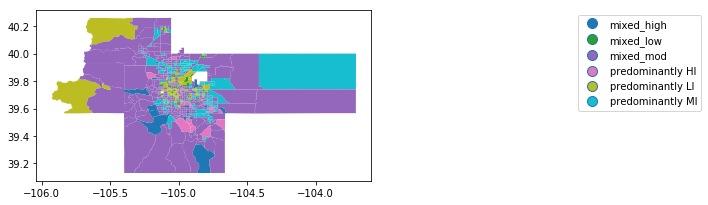

There are 7 NaN census tracts


In [278]:
print('HOUSING AFFORDABILITY')
ax = city_shp_merge.plot(color = 'white')
city_shp_merge[city_shp_merge['lmh_flag_new']!='.'].plot(ax = ax, column = 'lmh_flag_new', legend = True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1, 0, 0))
plt.show()
print('There are',(city_shp_merge['lmh_flag_new']=='.').sum(), 'NaN census tracts')

In [279]:
city_shp_merge.groupby('lmh_flag_new').count()['FIPS']

lmh_flag_new
.                     7
mixed_high           15
mixed_low            45
mixed_mod           349
predominantly HI     15
predominantly LI     87
predominantly MI    159
Name: FIPS, dtype: int64

In [280]:
city_shp_merge.groupby('aff_change_cat_full').count()['FIPS']

aff_change_cat_full
data unavailable              12
high_increase                  2
high_marginal                  1
high_rapid_increase           12
low_increase                  39
low_marginal                   9
low_neg                        1
low_rapid_increase            38
mixed_high_increase            2
mixed_high_rapid_increase     11
mixed_low_increase            25
mixed_low_marginal             3
mixed_low_rapid_increase      17
mixed_mod_increase           121
mixed_mod_marginal            13
mixed_mod_neg                  2
mixed_mod_rapid_increase     211
mod_increase                  59
mod_marginal                  15
mod_neg                        1
mod_rapid_increase            83
Name: FIPS, dtype: int64

MARKET CHANGE CATEGORIES


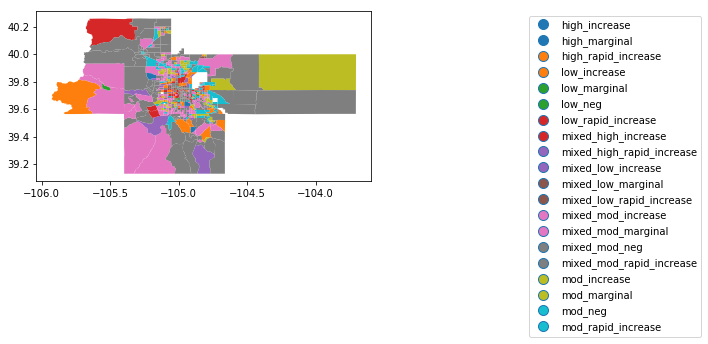

There are 12 NaN census tracts


In [281]:
print('MARKET CHANGE CATEGORIES')
ax = city_shp_merge.plot(color = 'white')
city_shp_merge[city_shp_merge['aff_change_cat_full']!='data unavailable'].plot(ax = ax, column = 'aff_change_cat_full', legend = True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1, 0, 0))
plt.show()
print('There are',(city_shp_merge['aff_change_cat_full']=='data unavailable').sum(), 'NaN census tracts')

In [282]:
city_shp_merge['lmh_flag_new_encoded'] = 0
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly LI', 'lmh_flag_new_encoded'] = 1
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_low', 'lmh_flag_new_encoded'] = 2
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly MI', 'lmh_flag_new_encoded'] = 3
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_mod', 'lmh_flag_new_encoded'] = 4
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly HI', 'lmh_flag_new_encoded'] = 5
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_high', 'lmh_flag_new_encoded'] = 6

city_shp_merge['aff_change_cat_full_encoded'] = 0
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_neg', 'aff_change_cat_full_encoded'] = 1
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_marginal', 'aff_change_cat_full_encoded'] = 2
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_increase', 'aff_change_cat_full_encoded'] = 3
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_rapid_increase', 'aff_change_cat_full_encoded'] = 4
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_neg', 'aff_change_cat_full_encoded'] = 5
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_marginal', 'aff_change_cat_full_encoded'] = 6
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_increase', 'aff_change_cat_full_encoded'] = 7
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_rapid_increase', 'aff_change_cat_full_encoded'] = 8
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_neg', 'aff_change_cat_full_encoded'] = 9
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_marginal', 'aff_change_cat_full_encoded'] = 10
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_increase', 'aff_change_cat_full_encoded'] = 11
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_rapid_increase', 'aff_change_cat_full_encoded'] = 12
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_neg', 'aff_change_cat_full_encoded'] = 13
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_marginal', 'aff_change_cat_full_encoded'] = 14
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_increase', 'aff_change_cat_full_encoded'] = 15
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_rapid_increase', 'aff_change_cat_full_encoded'] = 16
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_neg', 'aff_change_cat_full_encoded'] = 17
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_marginal', 'aff_change_cat_full_encoded'] = 18
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_increase', 'aff_change_cat_full_encoded'] = 19
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_rapid_increase', 'aff_change_cat_full_encoded'] = 20
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_neg', 'aff_change_cat_full_encoded'] = 21
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_marginal', 'aff_change_cat_full_encoded'] = 22
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_increase', 'aff_change_cat_full_encoded'] = 23
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_rapid_increase', 'aff_change_cat_full_encoded'] = 24

In [283]:
### Generate affordability/change category -- for mapping
df = city_shp_merge
var = 'aff_change_cat_map'
df[var] = ''
df[var] = np.where((df['aff_change_cat_full']=='low_neg')|(df['aff_change_cat_full']=='low_marginal'),'low_neg_little', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'low_increase','low_increase', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'low_rapid_increase','low_rapid_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_neg')|(df['aff_change_cat_full']=='mixed_low_marginal')|
                   (df['aff_change_cat_full']=='mod_neg')|(df['aff_change_cat_full']=='mod_marginal')|
                   (df['aff_change_cat_full']=='mixed_mod_neg')|(df['aff_change_cat_full']=='mixed_mod_marginal')|
                   (df['aff_change_cat_full']=='mixed_high_neg')|(df['aff_change_cat_full']=='mixed_high_marginal')
                   ,'modmix_neg_little', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_increase')|
                   (df['aff_change_cat_full']=='mod_increase')|
                   (df['aff_change_cat_full']=='mixed_mod_increase')|
                   (df['aff_change_cat_full']=='mixed_high_increase'),'modmix_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_rapid_increase')|
                   (df['aff_change_cat_full']=='mod_rapid_increase')|
                   (df['aff_change_cat_full']=='mixed_mod_rapid_increase')|
                   (df['aff_change_cat_full']=='mixed_high_rapid_increase'),'modmix_rapid_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='high_neg')|(df['aff_change_cat_full']=='high_marginal'),'high_neg_little', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'high_increase','high_increase', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'high_rapid_increase','high_rapid_increase', df[var])

In [284]:
df['aff_change_cat_map'].unique()

array(['low_rapid_increase', 'modmix_increase', 'modmix_neg_little',
       'modmix_rapid_increase', 'low_increase', '', 'high_neg_little',
       'low_neg_little', 'high_rapid_increase', 'high_increase'],
      dtype=object)

In [285]:
df.groupby('aff_change_cat_map').count()['FIPS']

aff_change_cat_map
                          12
high_increase              2
high_neg_little            1
high_rapid_increase       12
low_increase              39
low_neg_little            10
low_rapid_increase        38
modmix_increase          207
modmix_neg_little         34
modmix_rapid_increase    322
Name: FIPS, dtype: int64

## Output file for running typologies code

In [286]:
city_shp_merge.to_csv(out_folder + 'typology_input.csv')

In [291]:
import geopandas as gpd
city_shp = gpd.read_file(folder+'shp/cb_2017_08_tract_500k.shp')
city_shp['COUNTYFP'].unique()

### Keep only records for the census tracts defined in FIPS variable
city_shp['FIPS_temp']=str(8)+city_shp['COUNTYFP'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
city_shp = city_shp[city_shp['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
city_shp = city_shp.drop(columns='FIPS_temp')

city_shp = city_shp[['GEOID', 'COUNTYFP', 'geometry']]
print ('There are '+str(len(city_shp))+' census tracts in this city')
city_shp.head()

['8001', '8005', '8013', '8014', '8019', '8031', '8035', '8047', '8059']
There are 677 census tracts in this city


,GEOID,COUNTYFP,geometry
0,08001007801,001,"POLYGON ((-104.884652 39.743807, -104.875223 3..."
1,08001008506,001,"POLYGON ((-104.98987 39.914064, -104.986556 39..."
2,08001008508,001,"POLYGON ((-104.958888 39.907543, -104.958158 3..."
3,08001008546,001,"POLYGON ((-104.940213 39.92834999999999, -104...."
4,08001008801,001,"POLYGON ((-104.924155 39.82723, -104.918476 39..."
